## Importing Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import streamlit as st
import pydeck as pdk
import datetime as datetime

## Reading csv Files :

In [2]:
df_age=pd.read_csv('Datasets/COVID-19_Cases_Summarized_by_Age_Group.csv')

In [3]:
df_confirmed=pd.read_csv('Datasets/time_series_covid_19_confirmed.csv')
df_deaths=pd.read_csv('Datasets/time_series_covid_19_deaths.csv')
df_recovered=pd.read_csv('Datasets/time_series_covid_19_recovered.csv')

In [4]:
df=pd.read_csv('Datasets/covid_19_data.csv',parse_dates=['Last Update','ObservationDate'])
df

SNo ObservationDate     Province/State  Country/Region  \
0          1      2020-01-22              Anhui  Mainland China   
1          2      2020-01-22            Beijing  Mainland China   
2          3      2020-01-22          Chongqing  Mainland China   
3          4      2020-01-22             Fujian  Mainland China   
4          5      2020-01-22              Gansu  Mainland China   
...      ...             ...                ...             ...   
83406  83407      2020-08-09  Zaporizhia Oblast         Ukraine   
83407  83408      2020-08-09            Zeeland     Netherlands   
83408  83409      2020-08-09           Zhejiang  Mainland China   
83409  83410      2020-08-09    Zhytomyr Oblast         Ukraine   
83410  83411      2020-08-09       Zuid-Holland     Netherlands   

              Last Update  Confirmed  Deaths  Recovered  
0     2020-01-22 17:00:00        1.0     0.0        0.0  
1     2020-01-22 17:00:00       14.0     0.0        0.0  
2     2020-01-22 17:00:00        6.0     0.0        0.0  
3     2020-01-22 17:00:00        1.0     0.0        0.0  
4     2020-01-22 17:00:00        0.0     0.0        0.0  
...                   ...        ...     ...        ...  
83406 2020-08-10 04:34:55      937.0    22.0      652.0  
83407 2020-08-10 04:34:55      918.0    69.0        0.0  
83408 2020-08-10 04:34:55     1273.0     1.0     1268.0  
83409 2020-08-10 04:34:55     2131.0    41.0     1524.0  
83410 2020-08-10 04:34:55    14931.0  1312.0        0.0  

[83411 rows x 8 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83411 entries, 0 to 83410
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              83411 non-null  int64         
 1   ObservationDate  83411 non-null  datetime64[ns]
 2   Province/State   55618 non-null  object        
 3   Country/Region   83411 non-null  object        
 4   Last Update      83411 non-null  datetime64[ns]
 5   Confirmed        83411 non-null  float64       
 6   Deaths           83411 non-null  float64       
 7   Recovered        83411 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 5.1+ MB


In [6]:
df_confirmed

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.939110  67.709953        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186400   6.613100        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861000  71.276100        0   
265            NaN                Lesotho -29.610000  28.233600        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/31/20  8/1/20  \
0          0        0        0        0        0  ...    36675   36710   
1          0        0        0        0        0  ...     5276    5396   
2          0        0        0        0        0  ...    30394   30950   
3          0        0        0        0        0  ...      925     925   
4          0        0        0        0        0  ...     1148    1164   
..       ...      ...      ...      ...      ...  ...      ...     ...   
261        0        0        0        0        0  ...      871     874   
262        0        0        0        0        0  ...     1728    1730   
263        0        0        0        0        0  ...      378     386   
264        0        0        0        0        0  ...     7409    7451   
265        0        0        0        0        0  ...      604     702   

     8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  8/9/20  
0     36710   36747   36782   36829   36896   37015   37054   37054  
1      5519    5620    5750    5889    6016    6151    6275    6411  
2     31465   31972   32504   33055   33626   34155   34693   35160  
3       925     937     939     939     944     955     955     955  
4      1199    1280    1344    1395    1483    1538    1572    1672  
..      ...     ...     ...     ...     ...     ...     ...     ...  
261     874     874     875     878     878     878     878     878  
262    1734    1734    1760    1763    1768    1796    1797    1804  
263     386     386     388     388     396     396     399     399  
264    7495    7538    7583    7625    7665    7706    7706    7745  
265     718     718     726     726     742     742     742     742  

[266 rows x 205 columns]

In [7]:
df_deaths

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.939110  67.709953        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186400   6.613100        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861000  71.276100        0   
265            NaN                Lesotho -29.610000  28.233600        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/31/20  8/1/20  \
0          0        0        0        0        0  ...     1272    1283   
1          0        0        0        0        0  ...      157     161   
2          0        0        0        0        0  ...     1210    1223   
3          0        0        0        0        0  ...       52      52   
4          0        0        0        0        0  ...       52      54   
..       ...      ...      ...      ...      ...  ...      ...     ...   
261        0        0        0        0        0  ...       15      15   
262        0        0        0        0        0  ...      493     494   
263        0        0        0        0        0  ...        7       7   
264        0        0        0        0        0  ...       60      60   
265        0        0        0        0        0  ...       13      14   

     8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  8/9/20  
0      1284    1288    1288    1294    1298    1307    1312    1312  
1       166     172     176     182     188     189     193     199  
2      1231    1239    1248    1261    1273    1282    1293    1302  
3        52      52      52      52      52      52      52      52  
4        55      58      59      62      64      67      70      75  
..      ...     ...     ...     ...     ...     ...     ...     ...  
261      15      15      15      15      15      15      15      15  
262     497     499     506     508     508     512     512     515  
263       7       7       7       7       7       7       7       7  
264      61      61      61      61      62      62      62      62  
265      19      19      21      21      23      23      23      23  

[266 rows x 205 columns]

In [8]:
df_recovered

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.939110  67.709953        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
248            NaN  Sao Tome and Principe   0.186400   6.613100        0   
249            NaN                  Yemen  15.552727  48.516388        0   
250            NaN                Comoros -11.645500  43.333300        0   
251            NaN             Tajikistan  38.861000  71.276100        0   
252            NaN                Lesotho -29.610000  28.233600        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/31/20  8/1/20  \
0          0        0        0        0        0  ...    25509   25509   
1          0        0        0        0        0  ...     2952    2961   
2          0        0        0        0        0  ...    20537   20988   
3          0        0        0        0        0  ...      807     807   
4          0        0        0        0        0  ...      437     460   
..       ...      ...      ...      ...      ...  ...      ...     ...   
248        0        0        0        0        0  ...      778     782   
249        0        0        0        0        0  ...      862     862   
250        0        0        0        0        0  ...      330     330   
251        0        0        0        0        0  ...     6193    6233   
252        0        0        0        0        0  ...      144     171   

     8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  8/9/20  
0     25510   25669   25669   25742   25840   25903   25960   25960  
1      3018    3031    3031    3123    3155    3227    3268    3342  
2     21419   21901   22375   22802   23238   23667   24083   24506  
3       807     821     825     825     828     839     839     839  
4       461     476     503     506     520     544     564     567  
..      ...     ...     ...     ...     ...     ...     ...     ...  
248     787     787     794     795     797     799     800     800  
249     862     863     863     894     898     907     910     913  
250     330     330     340     340     340     353     369     369  
251    6276    6317    6356    6399    6443    6484    6484    6484  
252     173     173     174     174     175     175     175     175  

[253 rows x 205 columns]

## Preprocessing :

In [9]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     27793
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [10]:
df_confirmed.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
8/5/20              0
8/6/20              0
8/7/20              0
8/8/20              0
8/9/20              0
Length: 205, dtype: int64

In [11]:
df_deaths.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
8/5/20              0
8/6/20              0
8/7/20              0
8/8/20              0
8/9/20              0
Length: 205, dtype: int64

In [12]:
df_recovered.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
8/5/20              0
8/6/20              0
8/7/20              0
8/8/20              0
8/9/20              0
Length: 205, dtype: int64

In [13]:
#For Us countries are important , Not Province /State
#So we can see , We Have Null Values Province/State in Our Dataframes..So they are not that important
#, we can drop them or replace them..

In [14]:
df.drop(['SNo','Province/State'],inplace=True,axis=1)
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])

In [15]:
df

ObservationDate  Country/Region         Last Update  Confirmed  Deaths  \
0          2020-01-22  Mainland China 2020-01-22 17:00:00        1.0     0.0   
1          2020-01-22  Mainland China 2020-01-22 17:00:00       14.0     0.0   
2          2020-01-22  Mainland China 2020-01-22 17:00:00        6.0     0.0   
3          2020-01-22  Mainland China 2020-01-22 17:00:00        1.0     0.0   
4          2020-01-22  Mainland China 2020-01-22 17:00:00        0.0     0.0   
...               ...             ...                 ...        ...     ...   
83406      2020-08-09         Ukraine 2020-08-10 04:34:55      937.0    22.0   
83407      2020-08-09     Netherlands 2020-08-10 04:34:55      918.0    69.0   
83408      2020-08-09  Mainland China 2020-08-10 04:34:55     1273.0     1.0   
83409      2020-08-09         Ukraine 2020-08-10 04:34:55     2131.0    41.0   
83410      2020-08-09     Netherlands 2020-08-10 04:34:55    14931.0  1312.0   

       Recovered  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
83406      652.0  
83407        0.0  
83408     1268.0  
83409     1524.0  
83410        0.0  

[83411 rows x 6 columns]

In [16]:

df_confirmed=df_confirmed.replace(np.nan,'',regex=True)
df_deaths=df_deaths.replace(np.nan,'',regex=True)
df_recovered=df_recovered.replace(np.nan,'',regex=True)

In [17]:
df_confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0                   Afghanistan  33.93911  67.709953        0        0   
1                       Albania  41.15330  20.168300        0        0   
2                       Algeria  28.03390   1.659600        0        0   
3                       Andorra  42.50630   1.521800        0        0   
4                        Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/31/20  8/1/20  8/2/20  8/3/20  \
0        0        0        0        0  ...    36675   36710   36710   36747   
1        0        0        0        0  ...     5276    5396    5519    5620   
2        0        0        0        0  ...    30394   30950   31465   31972   
3        0        0        0        0  ...      925     925     925     937   
4        0        0        0        0  ...     1148    1164    1199    1280   

   8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  8/9/20  
0   36782   36829   36896   37015   37054   37054  
1    5750    5889    6016    6151    6275    6411  
2   32504   33055   33626   34155   34693   35160  
3     939     939     944     955     955     955  
4    1344    1395    1483    1538    1572    1672  

[5 rows x 205 columns]

In [18]:
df_confirmed_mapd=df_confirmed.copy()
df_confirmed_mapd=df_confirmed_mapd.drop(['Province/State',],axis=1)
#df_confirmed_mapd.columns=[['Country/Region','lat','long']]
df_confirmed_mapd

Country/Region        Lat       Long  1/22/20  1/23/20  1/24/20  \
0              Afghanistan  33.939110  67.709953        0        0        0   
1                  Albania  41.153300  20.168300        0        0        0   
2                  Algeria  28.033900   1.659600        0        0        0   
3                  Andorra  42.506300   1.521800        0        0        0   
4                   Angola -11.202700  17.873900        0        0        0   
..                     ...        ...        ...      ...      ...      ...   
261  Sao Tome and Principe   0.186400   6.613100        0        0        0   
262                  Yemen  15.552727  48.516388        0        0        0   
263                Comoros -11.645500  43.333300        0        0        0   
264             Tajikistan  38.861000  71.276100        0        0        0   
265                Lesotho -29.610000  28.233600        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  ...  7/31/20  8/1/20  8/2/20  8/3/20  \
0          0        0        0        0  ...    36675   36710   36710   36747   
1          0        0        0        0  ...     5276    5396    5519    5620   
2          0        0        0        0  ...    30394   30950   31465   31972   
3          0        0        0        0  ...      925     925     925     937   
4          0        0        0        0  ...     1148    1164    1199    1280   
..       ...      ...      ...      ...  ...      ...     ...     ...     ...   
261        0        0        0        0  ...      871     874     874     874   
262        0        0        0        0  ...     1728    1730    1734    1734   
263        0        0        0        0  ...      378     386     386     386   
264        0        0        0        0  ...     7409    7451    7495    7538   
265        0        0        0        0  ...      604     702     718     718   

     8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  8/9/20  
0     36782   36829   36896   37015   37054   37054  
1      5750    5889    6016    6151    6275    6411  
2     32504   33055   33626   34155   34693   35160  
3       939     939     944     955     955     955  
4      1344    1395    1483    1538    1572    1672  
..      ...     ...     ...     ...     ...     ...  
261     875     878     878     878     878     878  
262    1760    1763    1768    1796    1797    1804  
263     388     388     396     396     399     399  
264    7583    7625    7665    7706    7706    7745  
265     726     726     742     742     742     742  

[266 rows x 204 columns]

In [19]:
df_confirmed_mapd.Lat

0      33.939110
1      41.153300
2      28.033900
3      42.506300
4     -11.202700
         ...    
261     0.186400
262    15.552727
263   -11.645500
264    38.861000
265   -29.610000
Name: Lat, Length: 266, dtype: float64

## Analysis Of Data :

In [20]:
df['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [21]:
#Country Wise Aggregate of Cases :
group_country=df.groupby(['Country/Region','ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
group_country.head(30)

Confirmed  Recovered  Deaths
Country/Region  ObservationDate                              
 Azerbaijan     2020-02-28             1.0        0.0     0.0
('St. Martin',) 2020-03-10             2.0        0.0     0.0
Afghanistan     2020-02-24             1.0        0.0     0.0
                2020-02-25             1.0        0.0     0.0
                2020-02-26             1.0        0.0     0.0
                2020-02-27             1.0        0.0     0.0
                2020-02-28             1.0        0.0     0.0
                2020-02-29             1.0        0.0     0.0
                2020-03-01             1.0        0.0     0.0
                2020-03-02             1.0        0.0     0.0
                2020-03-03             1.0        0.0     0.0
                2020-03-04             1.0        0.0     0.0
                2020-03-05             1.0        0.0     0.0
                2020-03-06             1.0        0.0     0.0
                2020-03-07             1.0        0.0     0.0
                2020-03-08             4.0        0.0     0.0
                2020-03-09             4.0        0.0     0.0
                2020-03-10             5.0        0.0     0.0
                2020-03-11             7.0        0.0     0.0
                2020-03-12             7.0        0.0     0.0
                2020-03-13             7.0        0.0     0.0
                2020-03-14            11.0        0.0     0.0
                2020-03-15            16.0        0.0     0.0
                2020-03-16            21.0        1.0     0.0
                2020-03-17            22.0        1.0     0.0
                2020-03-18            22.0        1.0     0.0
                2020-03-19            22.0        1.0     0.0
                2020-03-20            24.0        1.0     0.0
                2020-03-21            24.0        1.0     0.0
                2020-03-22            40.0        1.0     1.0

In [22]:
group_country['Active Cases']=group_country['Confirmed']-group_country['Recovered']-group_country['Deaths']

In [23]:
#Datewise Distribution :
datewise_df=df.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [24]:
datewise_df

Confirmed   Recovered    Deaths
ObservationDate                                  
2020-01-22            555.0        28.0      17.0
2020-01-23            653.0        30.0      18.0
2020-01-24            941.0        36.0      26.0
2020-01-25           1438.0        39.0      42.0
2020-01-26           2118.0        52.0      56.0
...                     ...         ...       ...
2020-08-05       18811953.0  11356275.0  707820.0
2020-08-06       19097149.0  11545401.0  714940.0
2020-08-07       19378036.0  11737927.0  721324.0
2020-08-08       19637506.0  11939109.0  726781.0
2020-08-09       19861683.0  12115825.0  731326.0

[201 rows x 3 columns]

#### Some Basic Information :

In [25]:
print("Total countries Affected : ",df['Country/Region'].nunique())
print("Total number of Confirmed Cases around the World: ",datewise_df["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise_df["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise_df["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise_df["Confirmed"].iloc[-1]-datewise_df["Recovered"].iloc[-1]-datewise_df["Deaths"].iloc[-1]))

Total countries Affected :  223
Total number of Confirmed Cases around the World:  19861683.0
Total number of Recovered Cases around the World:  12115825.0
Total number of Deaths Cases around the World:  731326.0
Total number of Active Cases around the World:  7014532.0


In [26]:
print("Number of Confirmed Cases in last 24 hours: ",datewise_df["Confirmed"].iloc[-1]-datewise_df["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise_df["Recovered"].iloc[-1]-datewise_df["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise_df["Deaths"].iloc[-1]-datewise_df["Deaths"].iloc[-2])

Number of Confirmed Cases in last 24 hours:  224177.0
Number of Recovered Cases in last 24 hours:  176716.0
Number of Death Cases in last 24 hours:  4545.0


## DateWise Analysis :

In [27]:
#Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases


fig=px.bar(x=datewise_df.index,y=datewise_df["Confirmed"])
fig.update_layout(title="Distribution of Number of Confirmed Cases DAY Wise ",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [28]:
#Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases


fig=px.bar(x=datewise_df.index,y=datewise_df["Recovered"])
fig.update_layout(title="Distribution of Number of Recovered Cases DAY Wise ",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [29]:
#Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases


fig=px.bar(x=datewise_df.index,y=datewise_df["Deaths"])
fig.update_layout(title="Distribution of Number of Deaths Cases DAY Wise ",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [30]:
#Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases


fig=px.bar(x=datewise_df.index,y=datewise_df["Confirmed"]-datewise_df["Recovered"]-datewise_df["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases DAY Wise ",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [31]:
fig=px.bar(x=datewise_df.index,y=datewise_df["Recovered"]+datewise_df["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases DAY Wise")
fig.show()

In [32]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_df.index, y=datewise_df["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_df.index, y=datewise_df["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_df.index, y=datewise_df["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [33]:
#Calculating the Mortality Rate and Recovery Rate
datewise_df["Mortality Rate"]=(datewise_df["Deaths"]/datewise_df["Confirmed"])*100
datewise_df["Recovery Rate"]=(datewise_df["Recovered"]/datewise_df["Confirmed"])*100
datewise_df["Active Cases"]=datewise_df["Confirmed"]-datewise_df["Recovered"]-datewise_df["Deaths"]
datewise_df["Closed Cases"]=datewise_df["Recovered"]+datewise_df["Deaths"]

print("Average Mortality Rate",datewise_df["Mortality Rate"].mean())
print("Median Mortality Rate",datewise_df["Mortality Rate"].median())
print("Average Recovery Rate",datewise_df["Recovery Rate"].mean())
print("Median Recovery Rate",datewise_df["Recovery Rate"].median())



Average Mortality Rate 4.745638231023184
Median Mortality Rate 4.630409249630984
Average Recovery Rate 36.70957752828162
Median Recovery Rate 38.76555847660703


In [34]:
#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise_df.index, y=(datewise_df["Recovered"]/datewise_df["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise_df.index, y=(datewise_df["Deaths"]/datewise_df["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

In [35]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_df.index, y=datewise_df["Confirmed"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_df.index, y=datewise_df["Recovered"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_df.index, y=datewise_df["Deaths"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="7 Days Rolling Mean of Daily Increase of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

## CountryWise Analysis :

In [36]:
#Latest Update Of All Countries :
df[df['ObservationDate']==df['ObservationDate'].max()]

ObservationDate  Country/Region         Last Update  Confirmed  Deaths  \
82668      2020-08-09     Afghanistan 2020-08-10 04:34:55    37054.0  1312.0   
82669      2020-08-09         Albania 2020-08-10 04:34:55     6411.0   199.0   
82670      2020-08-09         Algeria 2020-08-10 04:34:55    35160.0  1302.0   
82671      2020-08-09         Andorra 2020-08-10 04:34:55      955.0    52.0   
82672      2020-08-09          Angola 2020-08-10 04:34:55     1672.0    75.0   
...               ...             ...                 ...        ...     ...   
83406      2020-08-09         Ukraine 2020-08-10 04:34:55      937.0    22.0   
83407      2020-08-09     Netherlands 2020-08-10 04:34:55      918.0    69.0   
83408      2020-08-09  Mainland China 2020-08-10 04:34:55     1273.0     1.0   
83409      2020-08-09         Ukraine 2020-08-10 04:34:55     2131.0    41.0   
83410      2020-08-09     Netherlands 2020-08-10 04:34:55    14931.0  1312.0   

       Recovered  
82668    25960.0  
82669     3342.0  
82670    24506.0  
82671      839.0  
82672      567.0  
...          ...  
83406      652.0  
83407        0.0  
83408     1268.0  
83409     1524.0  
83410        0.0  

[743 rows x 6 columns]

In [37]:
#Let us get a total cases Dataframe
df[df['ObservationDate']==df['ObservationDate'].max()].groupby(['Country/Region']).agg('sum').sort_values('Confirmed')

Confirmed    Deaths  Recovered
Country/Region                                       
MS Zaandam                   9.0       2.0        0.0
Western Sahara              10.0       1.0        8.0
Holy See                    12.0       0.0       12.0
Saint Kitts and Nevis       17.0       0.0       16.0
Dominica                    18.0       0.0       18.0
...                          ...       ...        ...
South Africa            559859.0   10408.0   411474.0
Russia                  885718.0   14903.0   692059.0
India                  2215074.0   44386.0  1535743.0
Brazil                 3035422.0  101049.0  2356983.0
US                     5044864.0  162938.0  1656864.0

[190 rows x 3 columns]

In [38]:
countrywise=df[df["ObservationDate"]==df["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [39]:
countrywise

Confirmed  Recovered    Deaths  Mortality    Recovery
Country/Region                                                              
US                     5044864.0  1656864.0  162938.0   3.229780   32.842590
Brazil                 3035422.0  2356983.0  101049.0   3.328993   77.649269
India                  2215074.0  1535743.0   44386.0   2.003816   69.331453
Russia                  885718.0   692059.0   14903.0   1.682590   78.135366
South Africa            559859.0   411474.0   10408.0   1.859040   73.496005
...                          ...        ...       ...        ...         ...
Dominica                    18.0       18.0       0.0   0.000000  100.000000
Saint Kitts and Nevis       17.0       16.0       0.0   0.000000   94.117647
Holy See                    12.0       12.0       0.0   0.000000  100.000000
Western Sahara              10.0        8.0       1.0  10.000000   80.000000
MS Zaandam                   9.0        0.0       2.0  22.222222    0.000000

[190 rows x 5 columns]

In [40]:
#Let us get last 24 hours cases by subtracting :
#Last record - last second record:



country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((group_country.loc[country].iloc[-1]-group_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((group_country.loc[country].iloc[-1]-group_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((group_country.loc[country].iloc[-1]-group_country.loc[country].iloc[-2])["Deaths"])

In [41]:
#Let Us create a dataframe for last 24 HOURS data :

Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,
                                            country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered",
                                            "Last 24 Hours Deaths"])

In [42]:

country_last_48_confirmed=[]
country_last_48_recovered=[]
country_last_48_deaths=[]
for country in countrywise.index:
    country_last_48_confirmed.append((group_country.loc[country].iloc[-1]-group_country.loc[country].iloc[-3])["Confirmed"])
    country_last_48_recovered.append((group_country.loc[country].iloc[-1]-group_country.loc[country].iloc[-3])["Recovered"])
    country_last_48_deaths.append((group_country.loc[country].iloc[-1]-group_country.loc[country].iloc[-3])["Deaths"])
    
    
    
Last_48_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_48_confirmed,country_last_48_recovered,
                                            country_last_48_deaths)),
                                   columns=["Country Name","Last 48 Hours Confirmed","Last 48 Hours Recovered",
                                            "Last 48 Hours Deaths"])




In [43]:
Last_48_Hours_country


#Since we have about 190 Countries , Let us plot Top 10 or 15  Major Countries , Worst Affected By this :

Top_15_Confirmed_48hr=Last_48_Hours_country.sort_values(["Last 48 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_48hr=Last_48_Hours_country.sort_values(["Last 48 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_48hr=Last_48_Hours_country.sort_values(["Last 48 Hours Deaths"],ascending=False).head(15)


In [44]:
Last_24_Hours_country

Country Name  Last 24 Hours Confirmed  Last 24 Hours Recovered  \
0                       US                  46935.0                  13746.0   
1                   Brazil                  23010.0                  35446.0   
2                    India                  62064.0                  54859.0   
3                   Russia                   5155.0                   3203.0   
4             South Africa                   6671.0                   6906.0   
..                     ...                      ...                      ...   
185               Dominica                      0.0                      0.0   
186  Saint Kitts and Nevis                      0.0                      0.0   
187               Holy See                      0.0                      0.0   
188         Western Sahara                      0.0                      0.0   
189             MS Zaandam                      0.0                      0.0   

     Last 24 Hours Deaths  
0                   515.0  
1                   572.0  
2                  1007.0  
3                    76.0  
4                   198.0  
..                    ...  
185                   0.0  
186                   0.0  
187                   0.0  
188                   0.0  
189                   0.0  

[190 rows x 4 columns]

In [45]:
#Since we have about 190 Countries , Let us plot Top 10 or 15  Major Countries , Worst Affected By this :

Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)

In [46]:
Top_15_Confirmed_24hr

Country Name  Last 24 Hours Confirmed  Last 24 Hours Recovered  \
2          India                  62064.0                  54859.0   
0             US                  46935.0                  13746.0   
1         Brazil                  23010.0                  35446.0   
6           Peru                  14149.0                   4849.0   
7       Colombia                  10611.0                   8097.0   
4   South Africa                   6671.0                   6906.0   
3         Russia                   5155.0                   3203.0   
16     Argentina                   4688.0                      0.0   
5         Mexico                   4376.0                   7307.0   
21   Philippines                   3028.0                    556.0   
20          Iraq                   2726.0                   2271.0   
14    Bangladesh                   2487.0                   1766.0   
8          Chile                   2033.0                   1693.0   
9           Iran                   2020.0                   2249.0   
22     Indonesia                   1893.0                   1646.0   

    Last 24 Hours Deaths  
2                 1007.0  
0                  515.0  
1                  572.0  
6                  423.0  
7                  302.0  
4                  198.0  
3                   76.0  
16                  83.0  
5                  292.0  
21                  61.0  
20                  82.0  
14                  34.0  
8                   66.0  
9                  163.0  
22                  65.0

Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

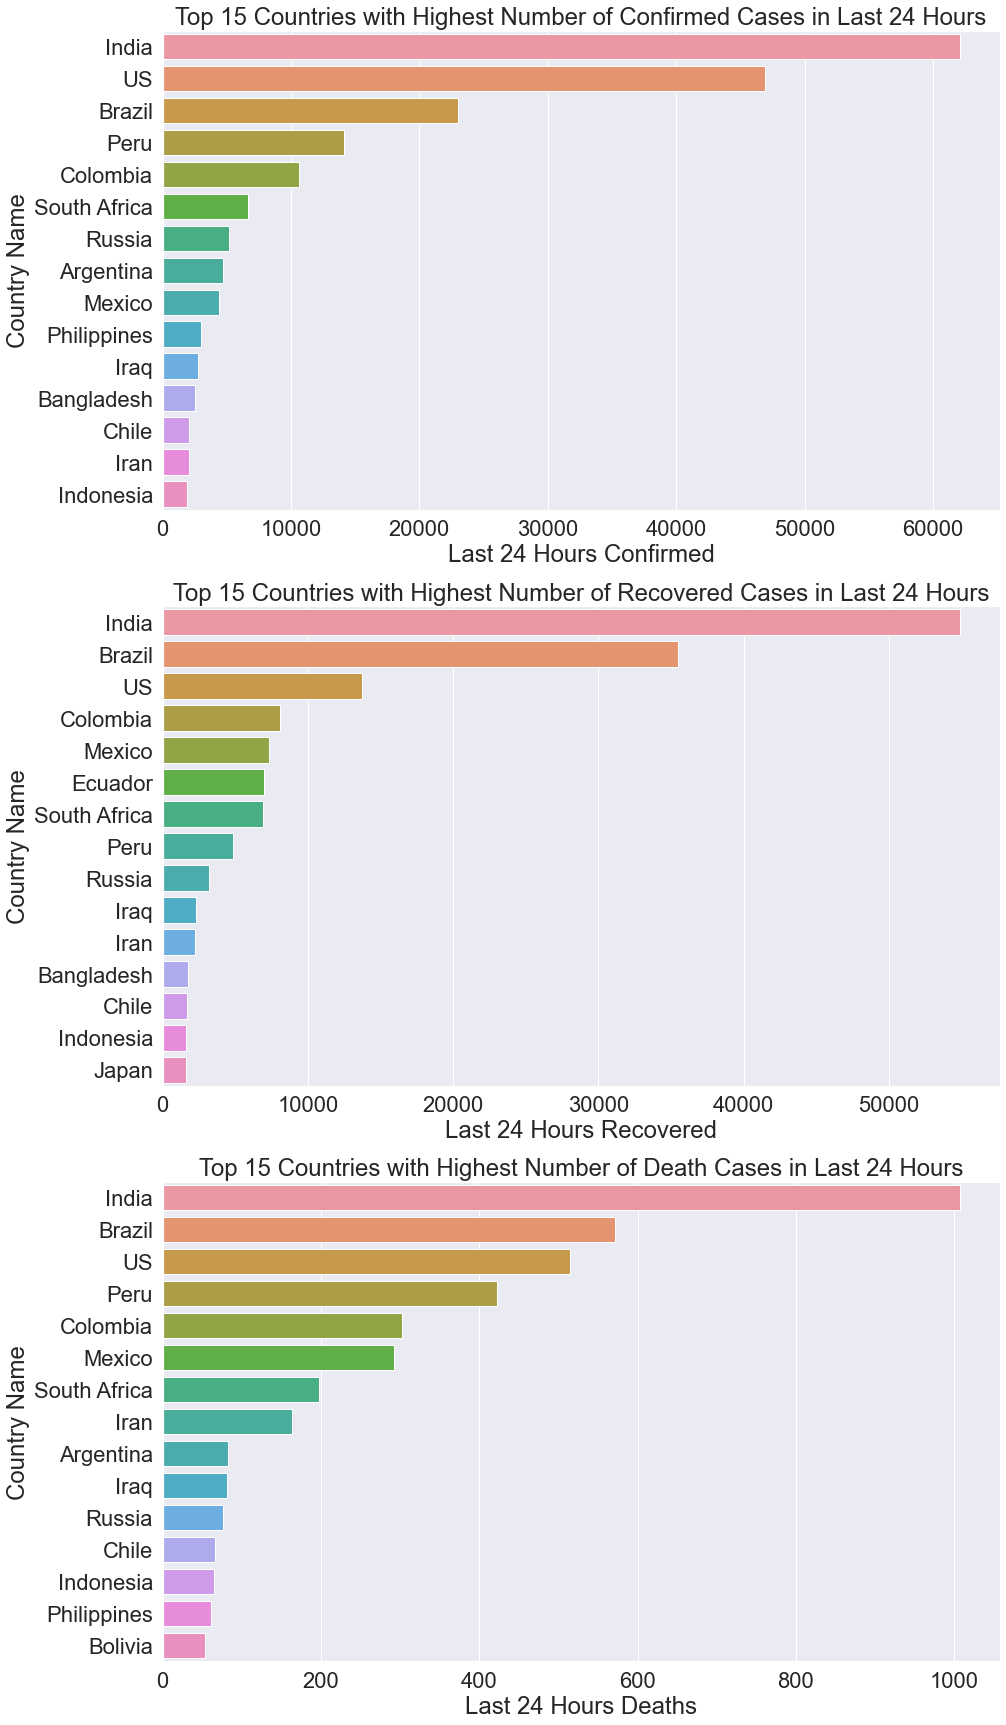

In [47]:
#Let Us Visualize This Data :

sns.set_style('darkgrid')
sns.set(font_scale=2.0)
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,30))


sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")

print('\n')
sns.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")


sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")


In [48]:
Bottom_15_Recoverd_24hr=Last_24_Hours_country[Last_24_Hours_country["Last 24 Hours Recovered"]>1].sort_values(["Last 24 Hours Recovered"],ascending=False).tail(15)
Bottom_15_Recoverd_24hr

Country Name  Last 24 Hours Confirmed  \
161                           Burundi                      3.0   
165                          Mongolia                      0.0   
178  Saint Vincent and the Grenadines                      1.0   
133                            Angola                    100.0   
131                             Yemen                      7.0   
130                      Sierra Leone                     21.0   
118                          Slovakia                     30.0   
117                         Sri Lanka                      3.0   
18                             France                     29.0   
134                       New Zealand                      0.0   
123                         Lithuania                     21.0   
119                              Mali                      2.0   
168                          Cambodia                      3.0   
11                                 UK                   1113.0   
68                          Australia                    313.0   

     Last 24 Hours Recovered  Last 24 Hours Deaths  
161                      3.0                   0.0  
165                      3.0                   0.0  
178                      3.0                   0.0  
133                      3.0                   5.0  
131                      3.0                   3.0  
130                      3.0                   0.0  
118                      3.0                   0.0  
117                      3.0                   0.0  
18                       3.0                   0.0  
134                      2.0                   0.0  
123                      2.0                   0.0  
119                      2.0                   0.0  
168                      2.0                   0.0  
11                       2.0                   8.0  
68                       2.0                  18.0

In [49]:

Bottom_15_Confirmed_24hr=Last_24_Hours_country[Last_24_Hours_country["Last 24 Hours Confirmed"]>0].sort_values(["Last 24 Hours Recovered"],ascending=False).tail(15)

Bottom_15_Recoverd_24hr=Last_24_Hours_country[Last_24_Hours_country["Last 24 Hours Recovered"]>0].sort_values(["Last 24 Hours Recovered"],ascending=False).tail(15)

Bottom_15_Deaths_24hr=Last_24_Hours_country[Last_24_Hours_country["Last 24 Hours Deaths"]>0].sort_values(["Last 24 Hours Recovered"],ascending=False).tail(15)


Text(0.5, 1.0, 'Bottom 15 Countries with Highest Number of Death Cases in Last 24 Hours')

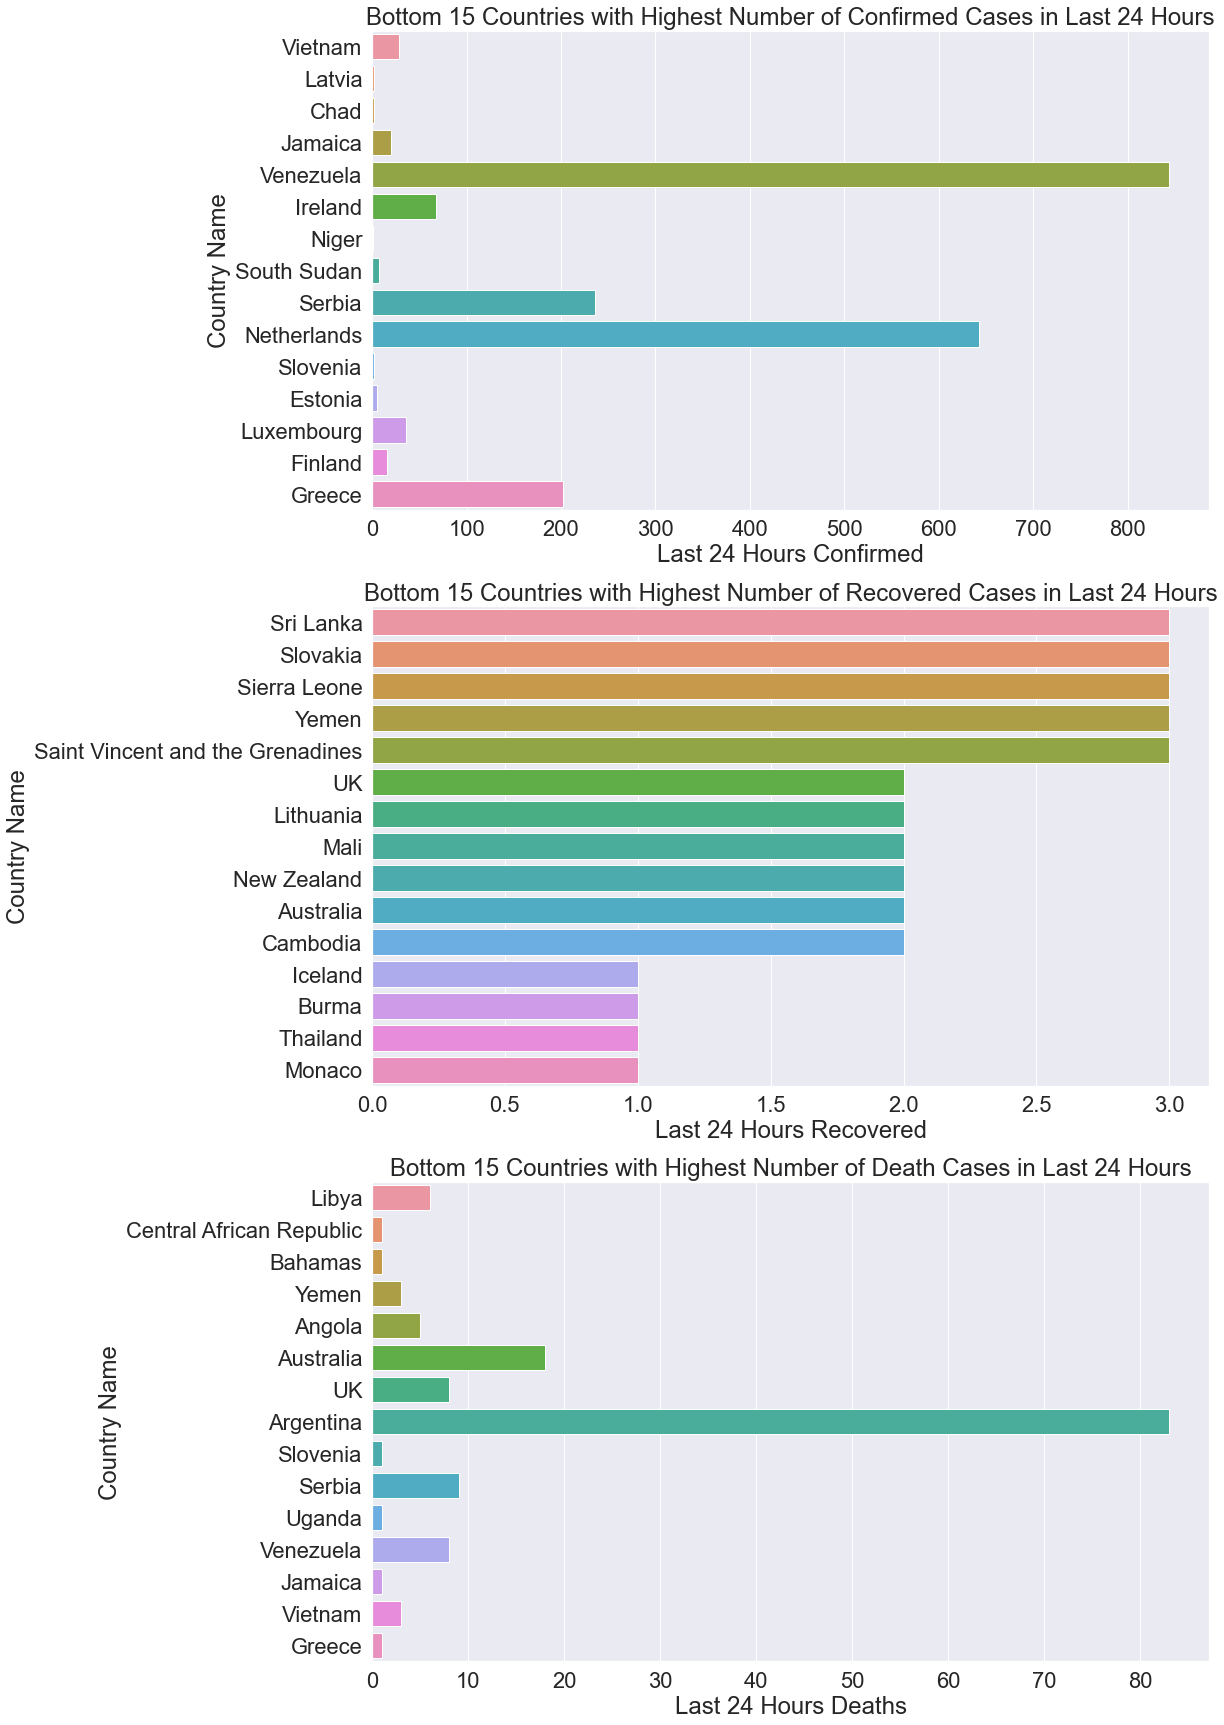

In [50]:

sns.set_style('darkgrid')
sns.set(font_scale=2.0)
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,30))


sns.barplot(x=Bottom_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Bottom_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Bottom 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")


print('\n')
sns.barplot(x=Bottom_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Bottom_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Bottom 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")


sns.barplot(x=Bottom_15_Deaths_24hr["Last 24 Hours Deaths"],y=Bottom_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Bottom 15 Countries with Highest Number of Death Cases in Last 24 Hours")


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

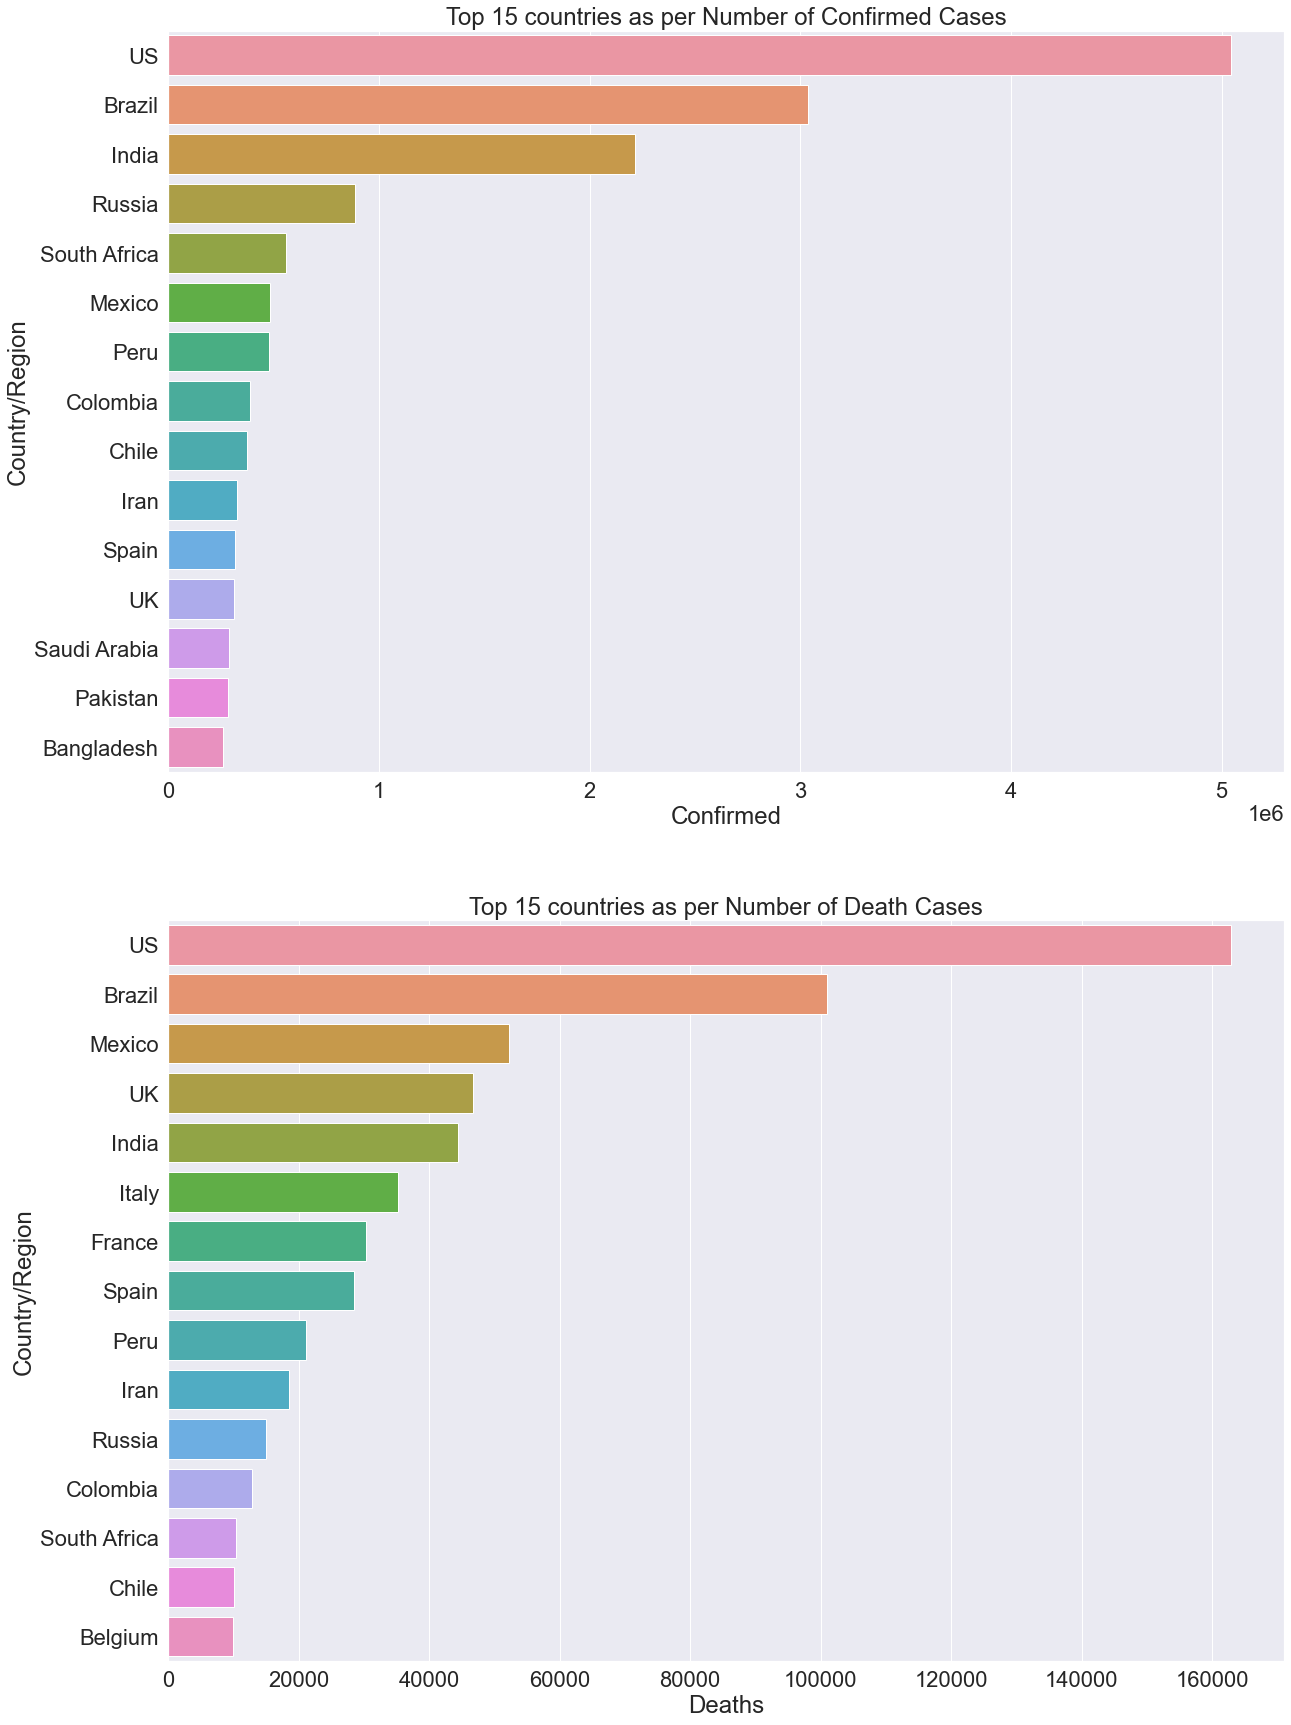

In [51]:

#Similarly We Can Plot Top Countries as per OverAll Cases :

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,30))

top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)


sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")


sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

In [52]:

top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)

#top_15_confirmed
fig=px.bar(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,orientation='h',color=top_15_confirmed["Confirmed"])

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()




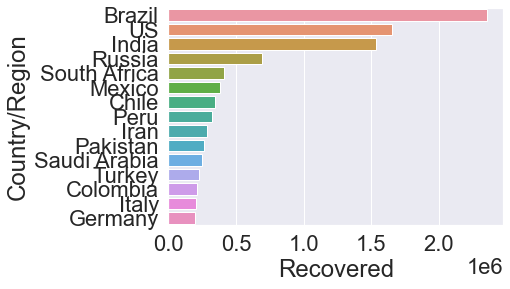

In [53]:
plt.tight_layout()
top_15_recovered=countrywise.sort_values(["Recovered"],ascending=False).head(15)
top_15_recovered

sns.barplot(x=top_15_recovered["Recovered"],y=top_15_recovered.index)


In [54]:
top_15_recovered

Confirmed  Recovered    Deaths  Mortality   Recovery
Country/Region                                                      
Brazil          3035422.0  2356983.0  101049.0   3.328993  77.649269
US              5044864.0  1656864.0  162938.0   3.229780  32.842590
India           2215074.0  1535743.0   44386.0   2.003816  69.331453
Russia           885718.0   692059.0   14903.0   1.682590  78.135366
South Africa     559859.0   411474.0   10408.0   1.859040  73.496005
Mexico           480278.0   384432.0   52298.0  10.889110  80.043641
Chile            373056.0   345826.0   10077.0   2.701203  92.700828
Peru             478024.0   324020.0   21072.0   4.408147  67.783208
Iran             326712.0   284371.0   18427.0   5.640136  87.040268
Pakistan         284121.0   260248.0    6082.0   2.140637  91.597594
Saudi Arabia     288690.0   252039.0    3167.0   1.097024  87.304375
Turkey           240804.0   223759.0    5844.0   2.426870  92.921629
Colombia         387481.0   212688.0   12842.0   3.314227  54.889917
Italy            250566.0   202098.0   35205.0  14.050190  80.656593
Germany          217288.0   196783.0    9202.0   4.234932  90.563216

Text(0.5, 0, 'Recovery (in Percentage)')

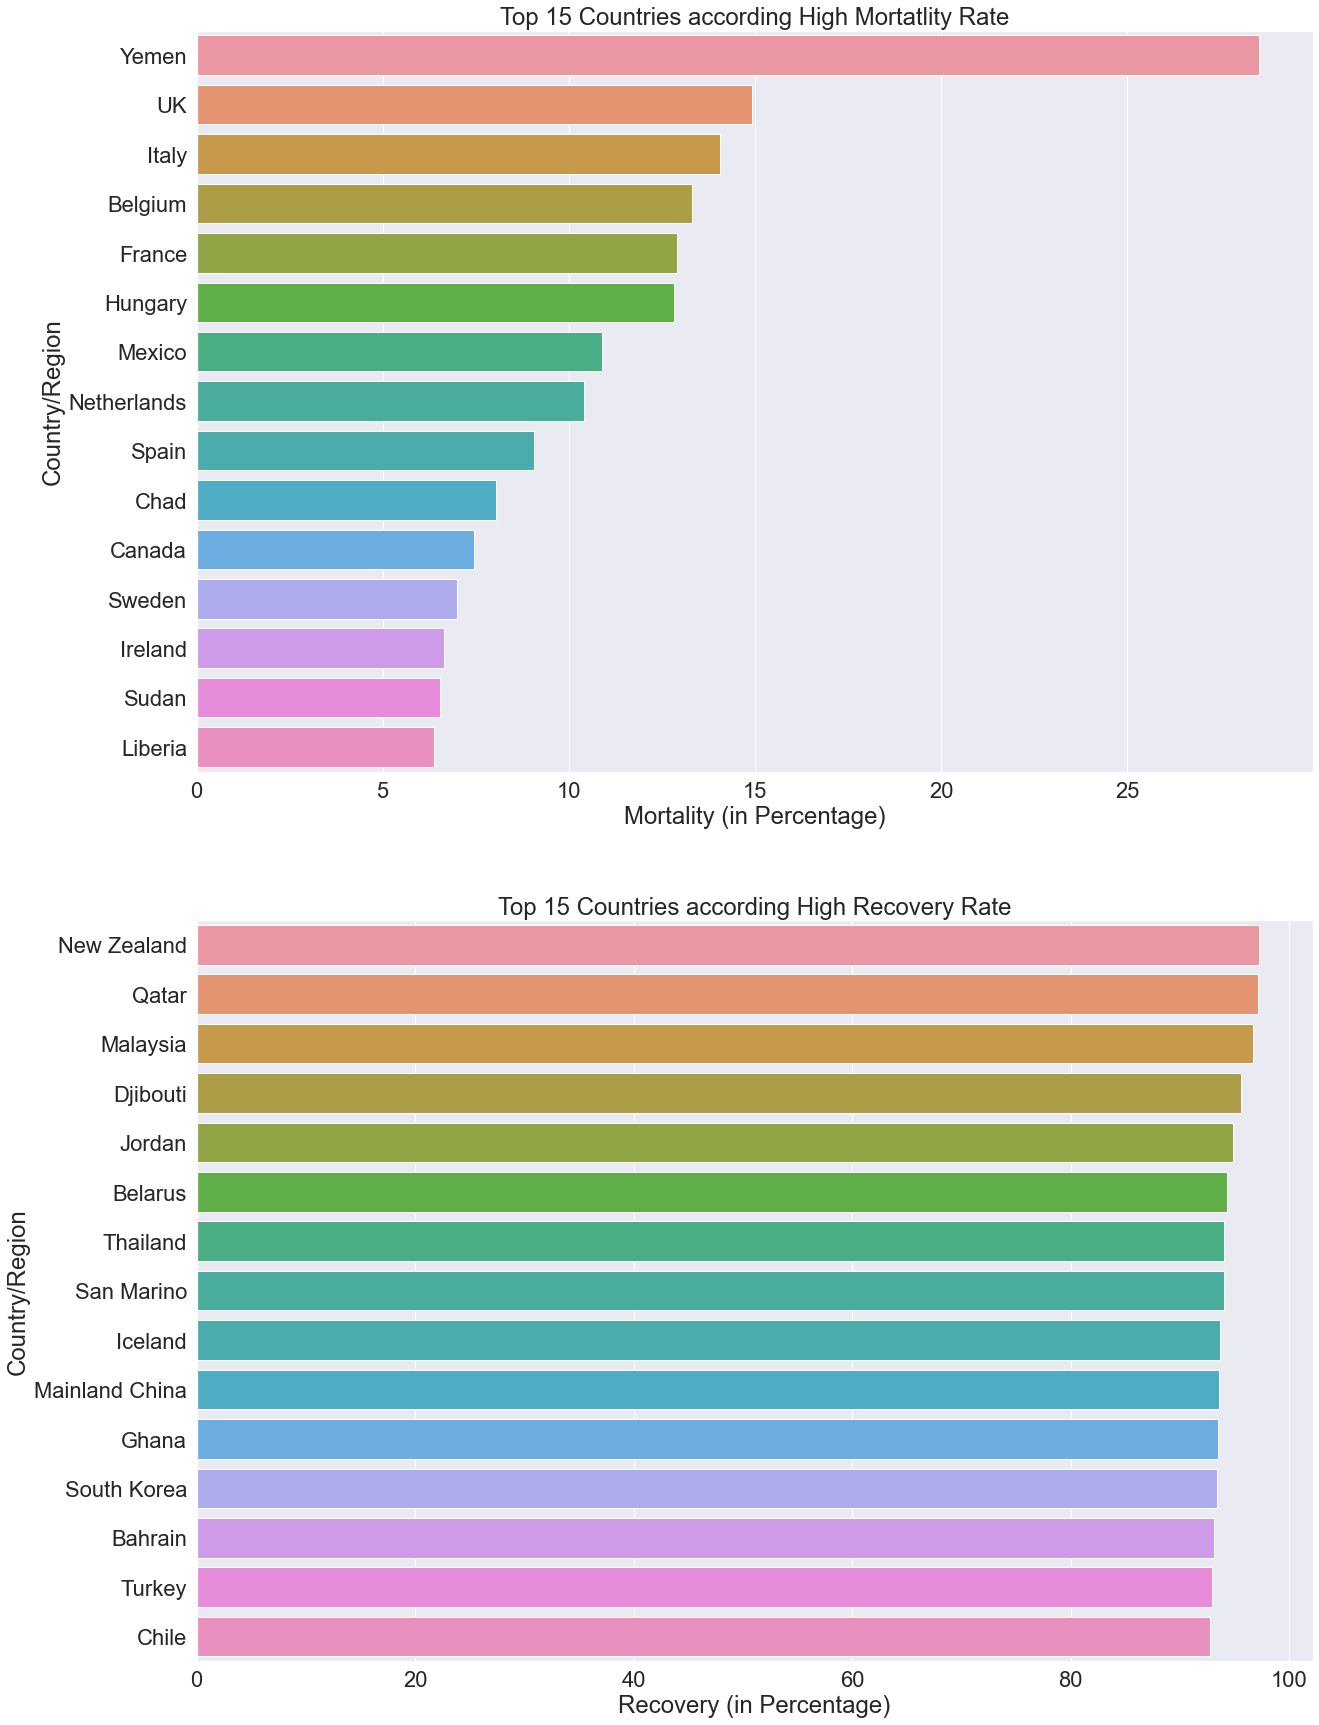

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,30))

countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)

sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)


sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")


Text(0.5, 0, 'Recovery (in Percentage)')

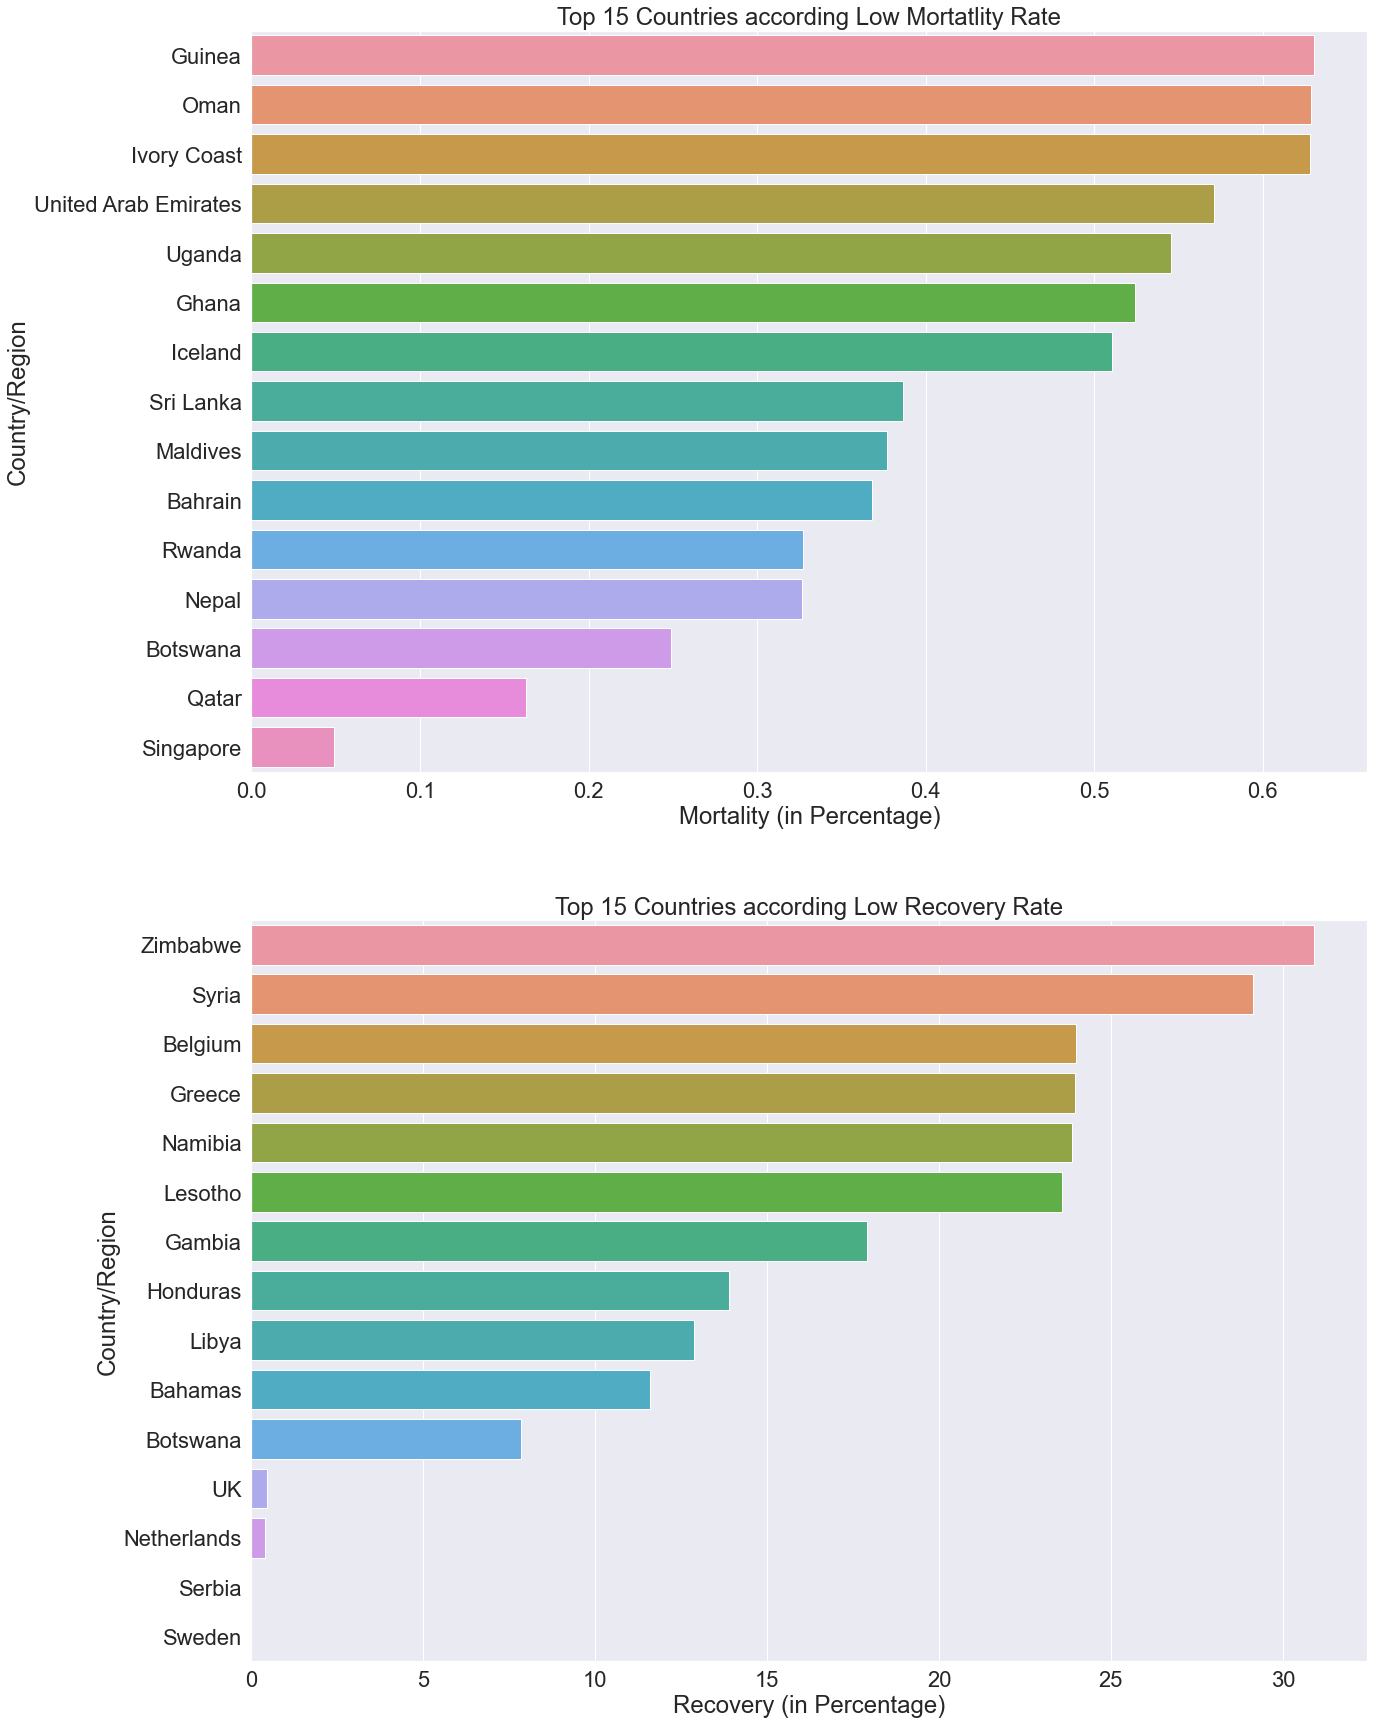

In [57]:

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,30))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

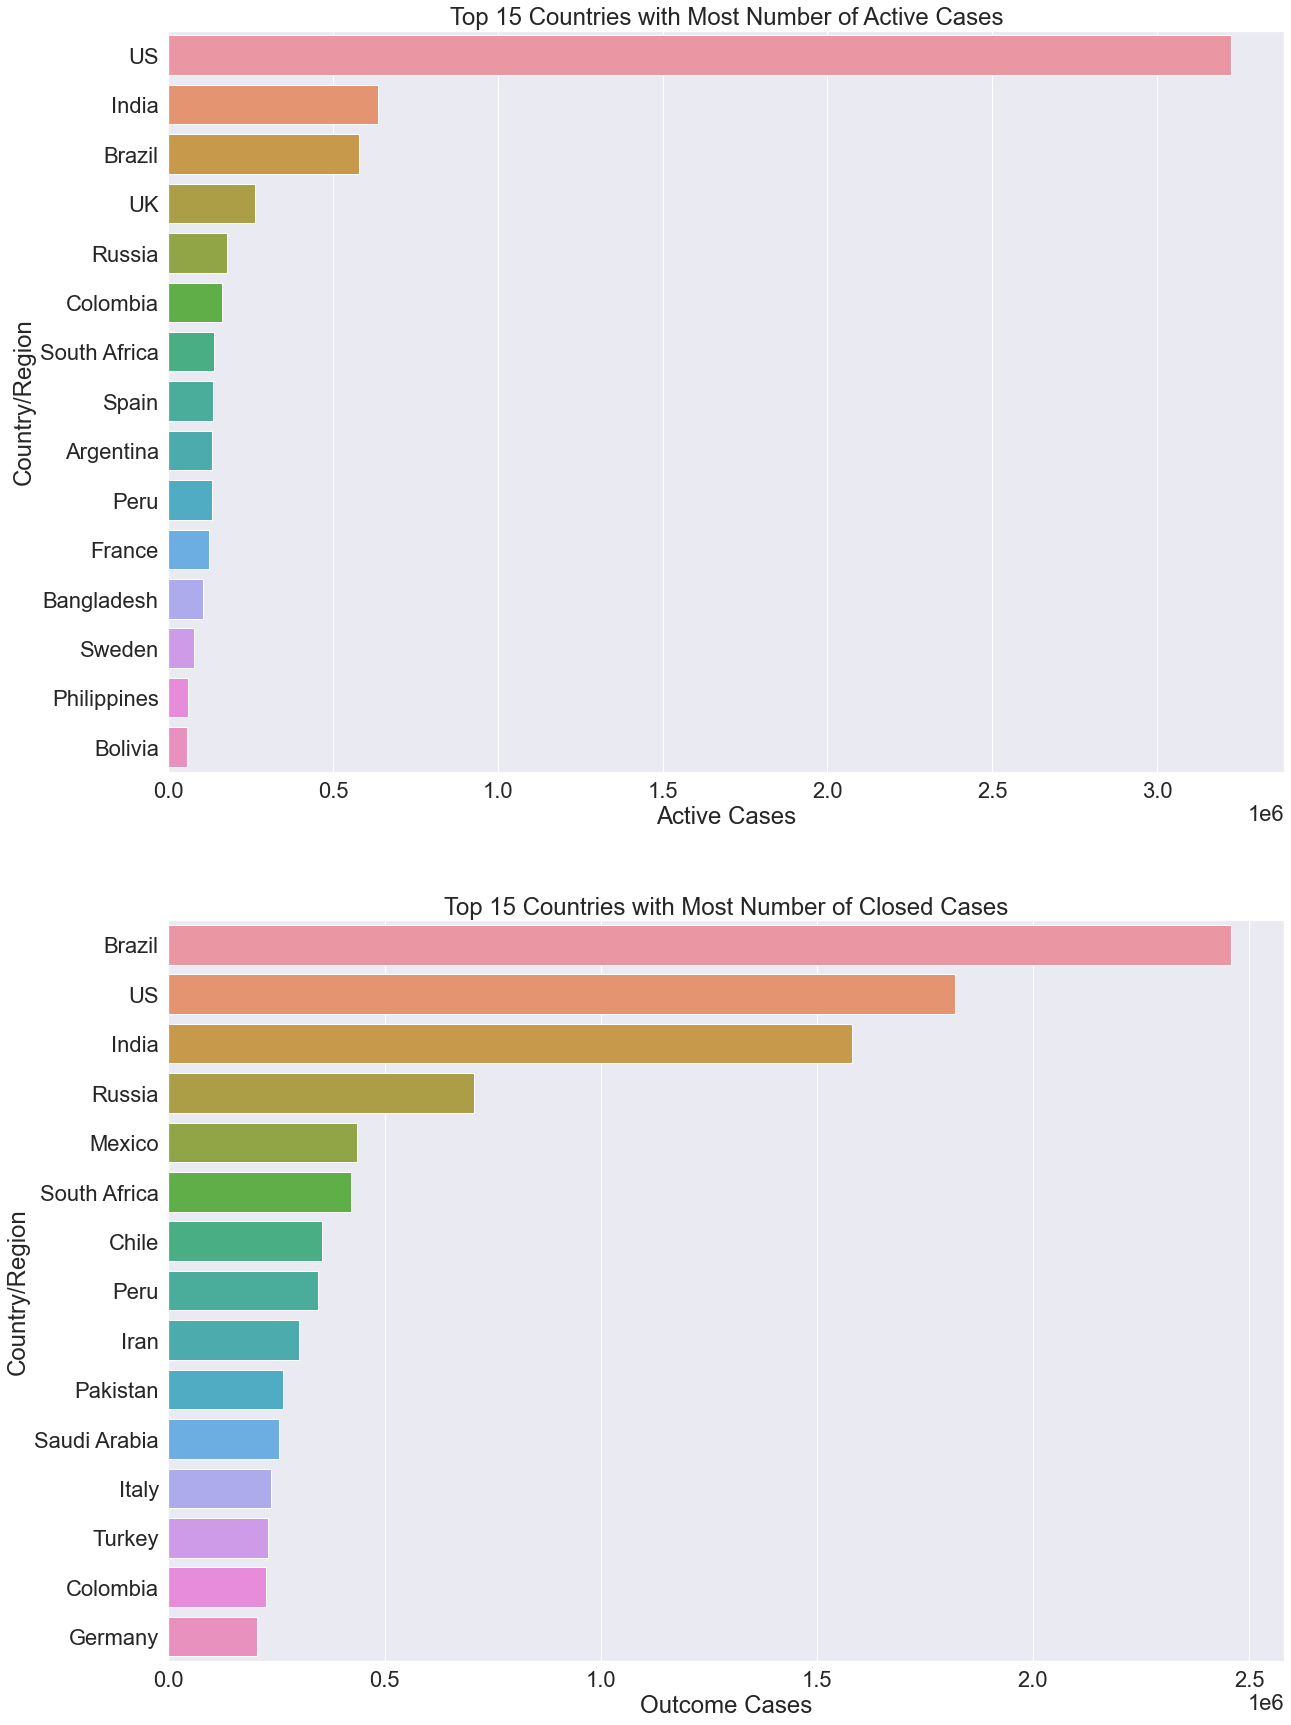

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,30))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [59]:
bottom_15_active=countrywise[countrywise["Active Cases"]>1].sort_values(["Active Cases"],ascending=False).tail(15)

Text(0.5, 1.0, 'Top 15 Countries with Least Number of Closed Cases')

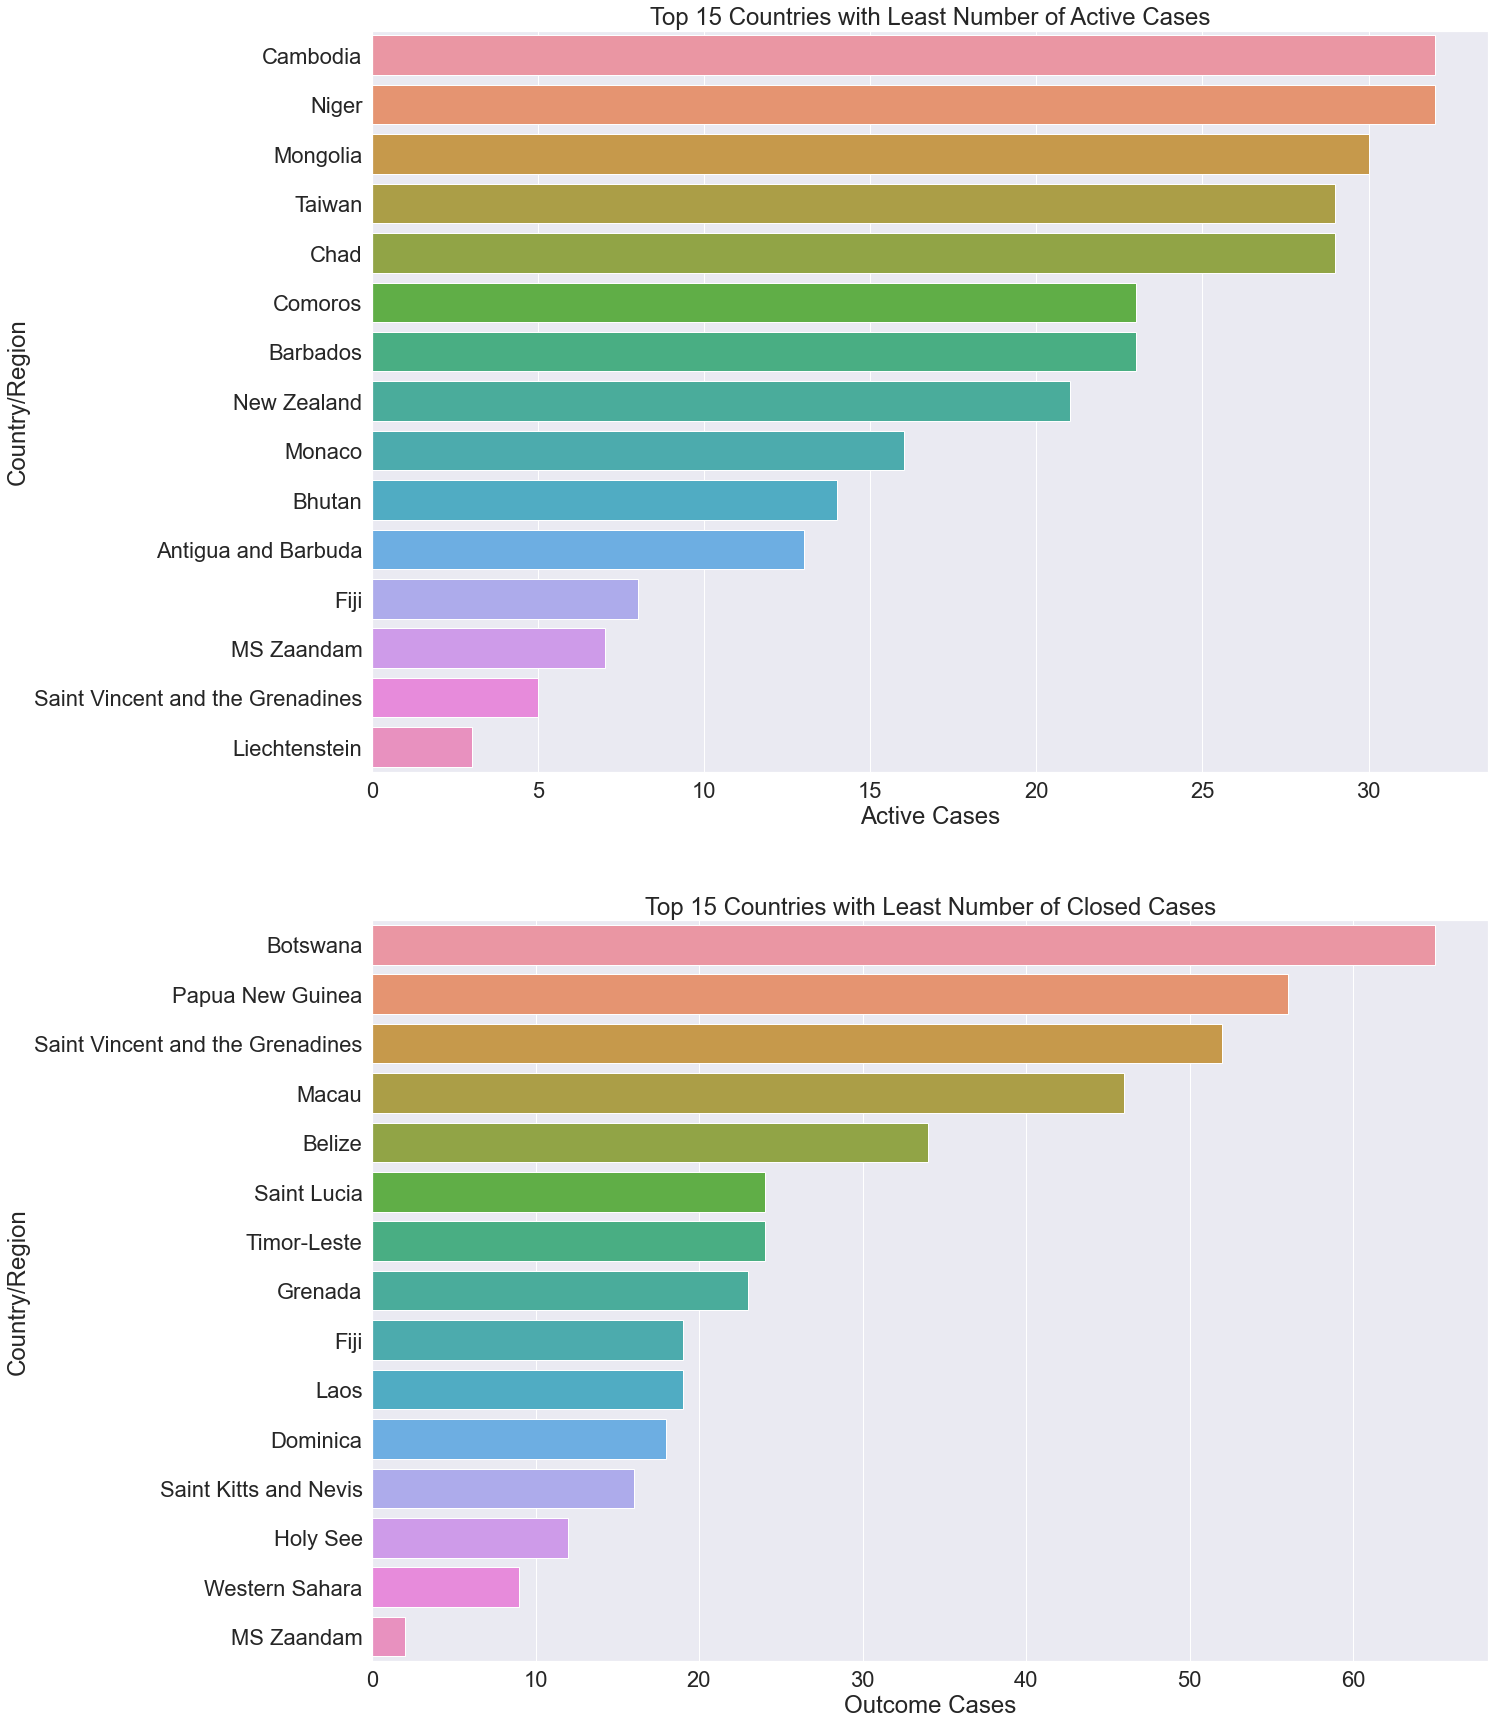

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,30))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
bottom_15_active=countrywise[countrywise["Active Cases"]>1].sort_values(["Active Cases"],ascending=False).tail(15)
bottom_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).tail(15)
sns.barplot(x=bottom_15_active["Active Cases"],y=bottom_15_active.index,ax=ax1)
sns.barplot(x=bottom_15_outcome["Outcome Cases"],y=bottom_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Least Number of Active Cases")
ax2.set_title("Top 15 Countries with Least Number of Closed Cases")

In [61]:
bottom_15_active=countrywise.sort_values(["Active Cases"],ascending=False).tail(15)
bottom_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).tail(15)
sns.barplot(x=bottom_15_active["Active Cases"],y=bottom_15_active.index,ax=ax1)

## Predictions :

In [62]:
df

ObservationDate  Country/Region         Last Update  Confirmed  Deaths  \
0          2020-01-22  Mainland China 2020-01-22 17:00:00        1.0     0.0   
1          2020-01-22  Mainland China 2020-01-22 17:00:00       14.0     0.0   
2          2020-01-22  Mainland China 2020-01-22 17:00:00        6.0     0.0   
3          2020-01-22  Mainland China 2020-01-22 17:00:00        1.0     0.0   
4          2020-01-22  Mainland China 2020-01-22 17:00:00        0.0     0.0   
...               ...             ...                 ...        ...     ...   
83406      2020-08-09         Ukraine 2020-08-10 04:34:55      937.0    22.0   
83407      2020-08-09     Netherlands 2020-08-10 04:34:55      918.0    69.0   
83408      2020-08-09  Mainland China 2020-08-10 04:34:55     1273.0     1.0   
83409      2020-08-09         Ukraine 2020-08-10 04:34:55     2131.0    41.0   
83410      2020-08-09     Netherlands 2020-08-10 04:34:55    14931.0  1312.0   

       Recovered  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
83406      652.0  
83407        0.0  
83408     1268.0  
83409     1524.0  
83410        0.0  

[83411 rows x 6 columns]

In [63]:
confirm=df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
recover=df.groupby('ObservationDate').sum()['Recovered'].reset_index()
death=df.groupby('ObservationDate').sum()['Deaths'].reset_index()

In [64]:
confirm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  201 non-null    datetime64[ns]
 1   Confirmed        201 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [65]:
days_since_1_22=np.array([i for i in range(len(confirm['ObservationDate']))])
days_since_1_22

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [67]:
X=days_since_1_22.reshape(-1,1)
y=confirm['Confirmed'].values.reshape(-1,1)

In [68]:
X.shape

(201, 1)

In [69]:
y

array([[5.5500000e+02],
       [6.5300000e+02],
       [9.4100000e+02],
       [1.4380000e+03],
       [2.1180000e+03],
       [2.9270000e+03],
       [5.5780000e+03],
       [6.1650000e+03],
       [8.2350000e+03],
       [9.9250000e+03],
       [1.2038000e+04],
       [1.6787000e+04],
       [1.9881000e+04],
       [2.3892000e+04],
       [2.7636000e+04],
       [3.0818000e+04],
       [3.4392000e+04],
       [3.7121000e+04],
       [4.0151000e+04],
       [4.2763000e+04],
       [4.4803000e+04],
       [4.5222000e+04],
       [6.0370000e+04],
       [6.6887000e+04],
       [6.9032000e+04],
       [7.1226000e+04],
       [7.3260000e+04],
       [7.5138000e+04],
       [7.5641000e+04],
       [7.6199000e+04],
       [7.6843000e+04],
       [7.8599000e+04],
       [7.8985000e+04],
       [7.9570000e+04],
       [8.0415000e+04],
       [8.1397000e+04],
       [8.2756000e+04],
       [8.4124000e+04],
       [8.6013000e+04],
       [8.8371000e+04],
       [9.0309000e+04],
       [9.284400

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

In [72]:
X_train.shape

(180, 1)

In [73]:
X_test.shape

(21, 1)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,mean_absolute_error


In [75]:
svr=SVR()
lin_mod=LinearRegression()

In [76]:
rfc_model=RandomForestRegressor()

In [77]:
rfc_model.fit(X_train,y_train)

<ipython-input-77-87dfdd9fc7aa>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
pred=rfc_model.predict(X_test)

In [79]:
#val=scaler.inverse_transform(pred.reshape(-1,1))
#val

In [80]:
np.arange(1,21)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [81]:
len(y_train)

180

In [85]:
fig=px.line(y=confirm['Confirmed'])
fig.update_layout(xaxis_title='Number Of DAYS : 200', yaxis_title='Number Of Cases')

In [86]:
px.line(y=y_train.reshape(y_train.shape[0]))

In [87]:
fig1=px.line(y=y_train.reshape(y_train.shape[0]))
px.line(x=np.arange(181,202),y=pred.reshape(-1,1))
fig1.show()

In [88]:
confirm

ObservationDate   Confirmed
0        2020-01-22       555.0
1        2020-01-23       653.0
2        2020-01-24       941.0
3        2020-01-25      1438.0
4        2020-01-26      2118.0
..              ...         ...
196      2020-08-05  18811953.0
197      2020-08-06  19097149.0
198      2020-08-07  19378036.0
199      2020-08-08  19637506.0
200      2020-08-09  19861683.0

[201 rows x 2 columns]

In [89]:
#confirm.index=pd.DatetimeIndex(confirm.index.values,freq=confirm.index.inferred_freq)

In [90]:
data = pd.Series(confirm.Confirmed.values, index=confirm.ObservationDate.values)
data

2020-01-22         555.0
2020-01-23         653.0
2020-01-24         941.0
2020-01-25        1438.0
2020-01-26        2118.0
                 ...    
2020-08-05    18811953.0
2020-08-06    19097149.0
2020-08-07    19378036.0
2020-08-08    19637506.0
2020-08-09    19861683.0
Length: 201, dtype: float64

In [91]:
from statsmodels.tsa.arima_model import ARIMA

In [93]:
model=ARIMA(data,order=(5,1,0),missing='drop')
model_fit = model.fit(disp=0)
print(model_fit.summary())


c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  200
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2211.050
Method:                       css-mle   S.D. of innovations          15106.286
Date:                Mon, 17 Aug 2020   AIC                           4436.100
Time:                        22:16:05   BIC                           4459.188
Sample:                    01-23-2020   HQIC                          4445.444
                         - 08-09-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.931e+04   1.15e+05      0.863      0.388   -1.26e+05    3.25e+05
ar.L1.D.y      0.5915      0.065      9.077      0.000       0.464       0.719
ar.L2.D.y      0.4047      0.077      5.249      0.0

c:\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

c:\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 863395341.300


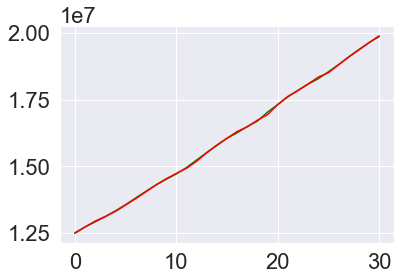

In [94]:
X1 = data.values
size = int(len(X1) * 0.85)
train, test = X1[0:size], X1[size:len(X1)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model_c = ARIMA(history, order=(5,1,0))
	model_c_fit = model_c.fit(disp=0)
	output = model_c_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test,color='green')
plt.plot(predictions, color='red')
plt.show()

In [95]:

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [96]:
X1 = data.values
size = int(len(X1) * 0.85)
train, test = X1[0:size], X1[size:len(X1)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model_c = ARIMA(history, order=(5,1,0))
    model_c_fit = model_c.fit(disp=0)
    output = model_c_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
print('Done')
    
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__


model_c_fit.save('model_confirm.pkl')

c:\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

c:\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Done


In [98]:
loaded_c_model=ARIMAResults.load('model_confirm.pkl')

In [99]:
len(train)

170

In [100]:
len(test)

31

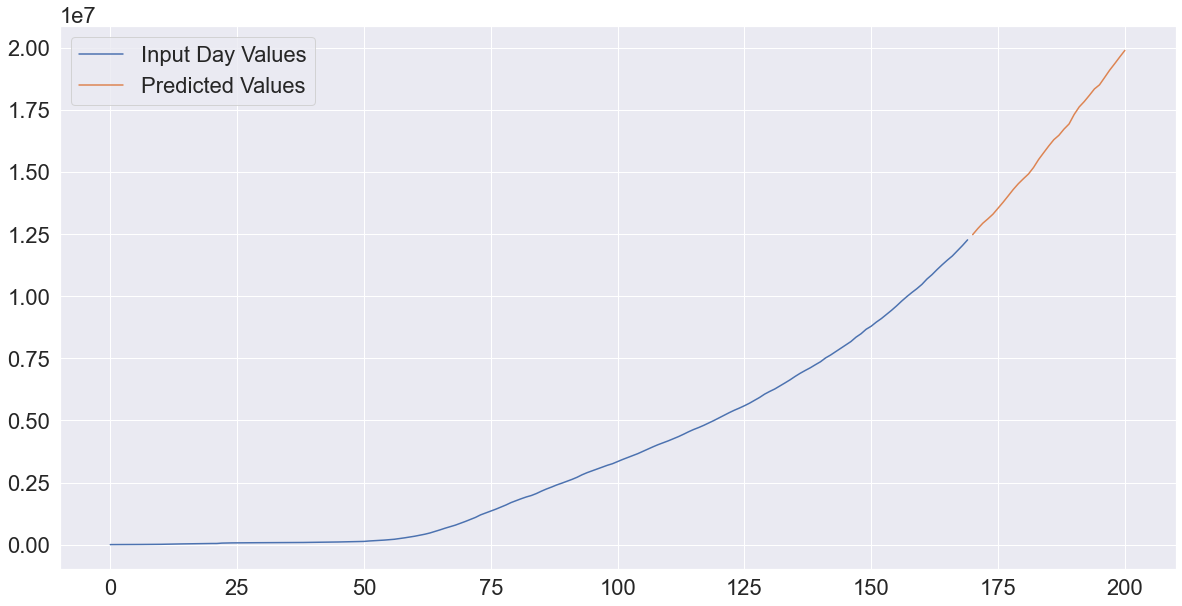

In [101]:
plt.figure(figsize=(20,10))
plt.plot(X1[0:size])

plt.plot(np.arange(len(train),len(train)+len(test)),predictions)

plt.legend(['Input Day Values','Predicted Values'])


In [102]:
np.array(predictions)

array([[12478001.5702302 ],
       [12718117.68736388],
       [12937632.08787633],
       [13112690.05682374],
       [13301637.91233686],
       [13540833.39785758],
       [13781450.3895409 ],
       [14037181.52799508],
       [14295715.5933356 ],
       [14527378.12929581],
       [14728027.26915494],
       [14918839.20326212],
       [15181473.62953942],
       [15502922.45020183],
       [15777088.00612033],
       [16047641.94960834],
       [16299791.60492051],
       [16476913.86749422],
       [16725141.23715869],
       [16932151.01859336],
       [17312554.68836375],
       [17618619.42419731],
       [17836176.96235505],
       [18083691.61418768],
       [18342398.47808917],
       [18508039.13147085],
       [18800750.21855677],
       [19097274.69445967],
       [19360349.12784158],
       [19631700.2023207 ],
       [19894160.12012578]])

In [103]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=np.arange(0,len(train)),y=train,mode='lines',name='Actual'))

fig.add_trace(go.Scatter(x=np.arange(len(train),len(train)+len(test)),y=np.array(predictions).reshape(np.array(predictions).shape[0]),mode='lines+markers',name='Predictions'))
fig.update_layout(xaxis_title='Number Of Days',yaxis_title='Number Of Cases',title='Comparison Of Actual VS Predicted Values')

fig.show()

In [104]:
confirm=df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
recover=df.groupby('ObservationDate').sum()['Recovered'].reset_index()
death=df.groupby('ObservationDate').sum()['Deaths'].reset_index()

In [105]:
def get_predictions(val):  
        
        if(val==confirm):
            data = pd.Series(confirm.Confirmed.values, index=confirm.ObservationDate.values)
            
        elif(val==recover):
            data = pd.Series(recover.Recovered.values, index=recover.ObservationDate.values)
            
        elif(val==death):
            data = pd.Series(death.Deaths.values, index=death.ObservationDate.values)
            
        model=ARIMA(data,order=(5,1,0),missing='drop')
        model_fit = model.fit(disp=0)
        print(model_fit.summary())
        
        X1 = data.values
        size = int(len(X1) * 0.85)
        train, test = X1[0:size], X1[size:len(X1)]
        history = [x for x in train]
        predictions = list()
        for t in range(len(test)):
            model = ARIMA(history, order=(5,1,0))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
            
            
        plt.figure(figsize=(20,10))
        plt.plot(X1[0:size])

        plt.plot(np.arange(len(train),len(train)+len(test)),predictions)

        plt.legend(['Input Day Values','Predicted Values'])
        
        return plt.show()


        

    

In [107]:
death.Deaths.values

array([1.70000e+01, 1.80000e+01, 2.60000e+01, 4.20000e+01, 5.60000e+01,
       8.20000e+01, 1.31000e+02, 1.33000e+02, 1.71000e+02, 2.13000e+02,
       2.59000e+02, 3.62000e+02, 4.26000e+02, 4.92000e+02, 5.64000e+02,
       6.34000e+02, 7.19000e+02, 8.06000e+02, 9.06000e+02, 1.01300e+03,
       1.11300e+03, 1.11800e+03, 1.37100e+03, 1.52300e+03, 1.66600e+03,
       1.77000e+03, 1.86800e+03, 2.00700e+03, 2.12200e+03, 2.24700e+03,
       2.25100e+03, 2.45800e+03, 2.46900e+03, 2.62900e+03, 2.70800e+03,
       2.77000e+03, 2.81400e+03, 2.87200e+03, 2.94100e+03, 2.99600e+03,
       3.08500e+03, 3.16000e+03, 3.25400e+03, 3.34800e+03, 3.46000e+03,
       3.55800e+03, 3.80300e+03, 3.99600e+03, 4.26200e+03, 4.61500e+03,
       4.72000e+03, 5.40400e+03, 5.81900e+03, 6.44000e+03, 7.12600e+03,
       7.90500e+03, 8.73300e+03, 9.86700e+03, 1.12990e+04, 1.29730e+04,
       1.46230e+04, 1.64970e+04, 1.86150e+04, 2.11810e+04, 2.39700e+04,
       2.71980e+04, 3.06520e+04, 3.39250e+04, 3.75820e+04, 4.210

## Age Wise Analysis :

In [108]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Specimen Collection Date    1177 non-null   object
 1   Age Group                   1177 non-null   object
 2   New Confirmed Cases         1177 non-null   int64 
 3   Cumulative Confirmed Cases  1177 non-null   int64 
 4   Last Updated at             1177 non-null   object
dtypes: int64(2), object(3)
memory usage: 46.1+ KB


In [109]:
df_age['Last Updated at']=pd.to_datetime(df_age['Last Updated at'])
df_age['Specimen Collection Date']=pd.to_datetime(df_age['Specimen Collection Date'])

In [110]:
df_age

Specimen Collection Date Age Group  New Confirmed Cases  \
0                  2020-03-12     51-60                    2   
1                  2020-03-13     51-60                    2   
2                  2020-03-14     51-60                    1   
3                  2020-03-15     51-60                    0   
4                  2020-03-16     51-60                    8   
...                       ...       ...                  ...   
1172               2020-08-04     61-70                    7   
1173               2020-08-05     61-70                    5   
1174               2020-08-06     61-70                    1   
1175               2020-08-07     61-70                    2   
1176               2020-08-08     61-70                    0   

      Cumulative Confirmed Cases     Last Updated at  
0                              6 2020-08-09 15:15:02  
1                              8 2020-08-09 15:15:02  
2                              9 2020-08-09 15:15:02  
3                              9 2020-08-09 15:15:02  
4                             17 2020-08-09 15:15:02  
...                          ...                 ...  
1172                         525 2020-08-09 15:15:02  
1173                         530 2020-08-09 15:15:02  
1174                         531 2020-08-09 15:15:02  
1175                         533 2020-08-09 15:15:02  
1176                         533 2020-08-09 15:15:02  

[1177 rows x 5 columns]

In [111]:
fig=px.bar(y=df_age['Cumulative Confirmed Cases'],x=df_age['Age Group'])
fig.update_layout(title='Distribution Of Cases As Per Age : ',yaxis_title='Number Of Cumulative Cases',xaxis_title='Age Groups')
fig.show()

In [112]:
age_groups=pd.get_dummies(df_age['Age Group'])
age_groups

18-30  31-40  41-50  51-60  61-70  71-80  81+  under 18
0         0      0      0      1      0      0    0         0
1         0      0      0      1      0      0    0         0
2         0      0      0      1      0      0    0         0
3         0      0      0      1      0      0    0         0
4         0      0      0      1      0      0    0         0
...     ...    ...    ...    ...    ...    ...  ...       ...
1172      0      0      0      0      1      0    0         0
1173      0      0      0      0      1      0    0         0
1174      0      0      0      0      1      0    0         0
1175      0      0      0      0      1      0    0         0
1176      0      0      0      0      1      0    0         0

[1177 rows x 8 columns]

In [113]:
newage=pd.concat([df_age,age_groups],axis=1)
newage

Specimen Collection Date Age Group  New Confirmed Cases  \
0                  2020-03-12     51-60                    2   
1                  2020-03-13     51-60                    2   
2                  2020-03-14     51-60                    1   
3                  2020-03-15     51-60                    0   
4                  2020-03-16     51-60                    8   
...                       ...       ...                  ...   
1172               2020-08-04     61-70                    7   
1173               2020-08-05     61-70                    5   
1174               2020-08-06     61-70                    1   
1175               2020-08-07     61-70                    2   
1176               2020-08-08     61-70                    0   

      Cumulative Confirmed Cases     Last Updated at  18-30  31-40  41-50  \
0                              6 2020-08-09 15:15:02      0      0      0   
1                              8 2020-08-09 15:15:02      0      0      0   
2                              9 2020-08-09 15:15:02      0      0      0   
3                              9 2020-08-09 15:15:02      0      0      0   
4                             17 2020-08-09 15:15:02      0      0      0   
...                          ...                 ...    ...    ...    ...   
1172                         525 2020-08-09 15:15:02      0      0      0   
1173                         530 2020-08-09 15:15:02      0      0      0   
1174                         531 2020-08-09 15:15:02      0      0      0   
1175                         533 2020-08-09 15:15:02      0      0      0   
1176                         533 2020-08-09 15:15:02      0      0      0   

      51-60  61-70  71-80  81+  under 18  
0         1      0      0    0         0  
1         1      0      0    0         0  
2         1      0      0    0         0  
3         1      0      0    0         0  
4         1      0      0    0         0  
...     ...    ...    ...  ...       ...  
1172      0      1      0    0         0  
1173      0      1      0    0         0  
1174      0      1      0    0         0  
1175      0      1      0    0         0  
1176      0      1      0    0         0  

[1177 rows x 13 columns]

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le=LabelEncoder()

In [116]:
labels=le.fit_transform(df_age['Age Group'])
df_age['Labels']=labels

In [117]:
df_age

Specimen Collection Date Age Group  New Confirmed Cases  \
0                  2020-03-12     51-60                    2   
1                  2020-03-13     51-60                    2   
2                  2020-03-14     51-60                    1   
3                  2020-03-15     51-60                    0   
4                  2020-03-16     51-60                    8   
...                       ...       ...                  ...   
1172               2020-08-04     61-70                    7   
1173               2020-08-05     61-70                    5   
1174               2020-08-06     61-70                    1   
1175               2020-08-07     61-70                    2   
1176               2020-08-08     61-70                    0   

      Cumulative Confirmed Cases     Last Updated at  Labels  
0                              6 2020-08-09 15:15:02       3  
1                              8 2020-08-09 15:15:02       3  
2                              9 2020-08-09 15:15:02       3  
3                              9 2020-08-09 15:15:02       3  
4                             17 2020-08-09 15:15:02       3  
...                          ...                 ...     ...  
1172                         525 2020-08-09 15:15:02       4  
1173                         530 2020-08-09 15:15:02       4  
1174                         531 2020-08-09 15:15:02       4  
1175                         533 2020-08-09 15:15:02       4  
1176                         533 2020-08-09 15:15:02       4  

[1177 rows x 6 columns]

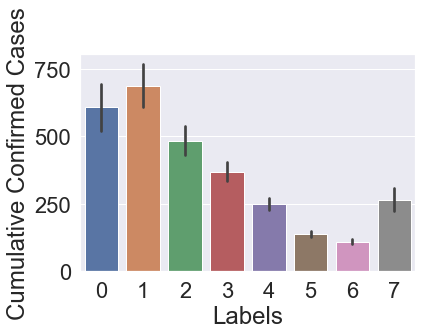

In [118]:
sns.barplot(x=df_age['Labels'],y=df_age['Cumulative Confirmed Cases'])

In [119]:
df_age['Age Group'].unique()

array(['51-60', '71-80', '31-40', '18-30', '81+', 'under 18', '41-50',
       '61-70'], dtype=object)

In [120]:
Xage=df_age.drop(['Specimen Collection Date','New Confirmed Cases','Last Updated at','Age Group'],axis=1)
yage=df_age['Labels']
Xage

Cumulative Confirmed Cases  Labels
0                              6       3
1                              8       3
2                              9       3
3                              9       3
4                             17       3
...                          ...     ...
1172                         525       4
1173                         530       4
1174                         531       4
1175                         533       4
1176                         533       4

[1177 rows x 2 columns]

In [121]:
yage

0       3
1       3
2       3
3       3
4       3
       ..
1172    4
1173    4
1174    4
1175    4
1176    4
Name: Labels, Length: 1177, dtype: int32

In [122]:
Xage_train, Xage_test, yage_train, yage_test = train_test_split(Xage, yage, test_size=0.1, random_state=0)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [124]:
log_model=LogisticRegression(multi_class='ovr',solver='sag')
log_model.fit(Xage_train,yage_train)

c:\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter wa

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
pred_log_mod=log_model.predict(Xage_test)

In [126]:
pd.DataFrame({'Actual':yage_test,'Predicted':pred_log_mod})

Actual  Predicted
483        0          1
933        2          1
1170       4          1
682        6          7
192        5          7
...      ...        ...
836        7          1
895        2          1
918        2          1
1129       4          1
27         3          1

[118 rows x 2 columns]

In [127]:
knn=KNeighborsClassifier(n_neighbors=8)

In [128]:
knn.fit(Xage_train,yage_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [129]:
pred_Class_age=knn.predict(Xage_test)
pred_Class_age

array([0, 3, 1, 6, 6, 2, 4, 4, 6, 0, 3, 4, 4, 3, 3, 1, 4, 3, 0, 5, 4, 2,
       4, 0, 2, 5, 1, 2, 0, 3, 1, 4, 5, 0, 5, 2, 4, 3, 5, 1, 0, 5, 1, 6,
       5, 5, 6, 6, 6, 1, 4, 6, 4, 5, 3, 5, 7, 3, 0, 7, 5, 5, 6, 3, 4, 7,
       1, 1, 4, 1, 5, 6, 5, 6, 5, 1, 5, 1, 3, 6, 0, 2, 4, 5, 2, 6, 2, 0,
       7, 6, 5, 2, 5, 3, 5, 1, 5, 0, 2, 0, 5, 1, 5, 0, 2, 5, 1, 5, 4, 3,
       5, 5, 1, 3, 4, 4, 2, 5])

In [130]:
pd.DataFrame({'Actual':yage_test,'Predicted':pred_Class_age})

Actual  Predicted
483        0          0
933        2          3
1170       4          1
682        6          6
192        5          6
...      ...        ...
836        7          3
895        2          4
918        2          4
1129       4          2
27         3          5

[118 rows x 2 columns]

In [131]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [132]:
print(classification_report(yage_test,pred_Class_age))

              precision    recall  f1-score   support

           0       0.15      0.15      0.15        13
           1       0.06      0.12      0.08         8
           2       0.50      0.25      0.33        24
           3       0.07      0.08      0.07        13
           4       0.29      0.23      0.26        22
           5       0.29      0.57      0.38        14
           6       0.64      0.69      0.67        13
           7       0.75      0.27      0.40        11

    accuracy                           0.30       118
   macro avg       0.35      0.30      0.29       118
weighted avg       0.36      0.30      0.30       118



In [133]:
df_sum_age=pd.read_csv('Datasets/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
df_sum_age

Data as of  Start week    End Week              State      Sex  \
0     08/05/2020  02/01/2020  08/01/2020      United States      All   
1     08/05/2020  02/01/2020  08/01/2020      United States      All   
2     08/05/2020  02/01/2020  08/01/2020      United States      All   
3     08/05/2020  02/01/2020  08/01/2020      United States      All   
4     08/05/2020  02/01/2020  08/01/2020      United States      All   
...          ...         ...         ...                ...      ...   
1411  08/05/2020  02/01/2020  08/01/2020        Puerto Rico   Female   
1412  08/05/2020  02/01/2020  08/01/2020        Puerto Rico   Female   
1413  08/05/2020  02/01/2020  08/01/2020        Puerto Rico   Female   
1414  08/05/2020  02/01/2020  08/01/2020        Puerto Rico  Unknown   
1415  08/05/2020  02/01/2020  08/01/2020  Puerto Rico Total      All   

              Age group  COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
0          Under 1 year             15.0        8832.0              82.0   
1             1-4 years             10.0        1690.0              55.0   
2            5-14 years             20.0        2611.0              86.0   
3           15-24 years            225.0       16353.0             326.0   
4           25-34 years           1074.0       33993.0            1250.0   
...                 ...              ...           ...               ...   
1411        75-84 years              0.0           0.0               0.0   
1412  85 years and over              0.0           0.0               0.0   
1413           All ages             10.0         468.0              44.0   
1414           All ages              0.0           NaN               0.0   
1415           All Ages             33.0        1501.0             115.0   

      Pneumonia and COVID-19 Deaths  Influenza Deaths  \
0                               2.0              14.0   
1                               2.0              41.0   
2                               6.0              50.0   
3                              77.0              52.0   
4                             477.0             150.0   
...                             ...               ...   
1411                            0.0               0.0   
1412                            0.0               0.0   
1413                            NaN               NaN   
1414                            0.0               0.0   
1415                           13.0               NaN   

      Pneumonia, Influenza, or COVID-19 Deaths  \
0                                        109.0   
1                                        104.0   
2                                        150.0   
3                                        522.0   
4                                       1983.0   
...                                        ...   
1411                                       0.0   
1412                                       0.0   
1413                                      53.0   
1414                                       0.0   
1415                                     141.0   

                                               Footnote  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
1411                                                NaN  
1412                                                NaN  
1413  One or more data cells have counts between 1–9...  
1414  One or more data cells have counts between 1–9...  
1415  One or more data cells have counts between 1–9...  

[1416 rows x 13 columns]

In [134]:
df_age_clean=df_sum_age.dropna(axis=1)
df_age_clean

Data as of  Start week    End Week              State      Sex  \
0     08/05/2020  02/01/2020  08/01/2020      United States      All   
1     08/05/2020  02/01/2020  08/01/2020      United States      All   
2     08/05/2020  02/01/2020  08/01/2020      United States      All   
3     08/05/2020  02/01/2020  08/01/2020      United States      All   
4     08/05/2020  02/01/2020  08/01/2020      United States      All   
...          ...         ...         ...                ...      ...   
1411  08/05/2020  02/01/2020  08/01/2020        Puerto Rico   Female   
1412  08/05/2020  02/01/2020  08/01/2020        Puerto Rico   Female   
1413  08/05/2020  02/01/2020  08/01/2020        Puerto Rico   Female   
1414  08/05/2020  02/01/2020  08/01/2020        Puerto Rico  Unknown   
1415  08/05/2020  02/01/2020  08/01/2020  Puerto Rico Total      All   

              Age group  
0          Under 1 year  
1             1-4 years  
2            5-14 years  
3           15-24 years  
4           25-34 years  
...                 ...  
1411        75-84 years  
1412  85 years and over  
1413           All ages  
1414           All ages  
1415           All Ages  

[1416 rows x 6 columns]

In [135]:
df_age_clean=df_age_clean.drop('Sex',axis=1)


In [136]:
df_age_clean.drop(df_age_clean[df_age_clean['Age group']=='All Ages'],axis=1)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1416 rows x 0 columns]

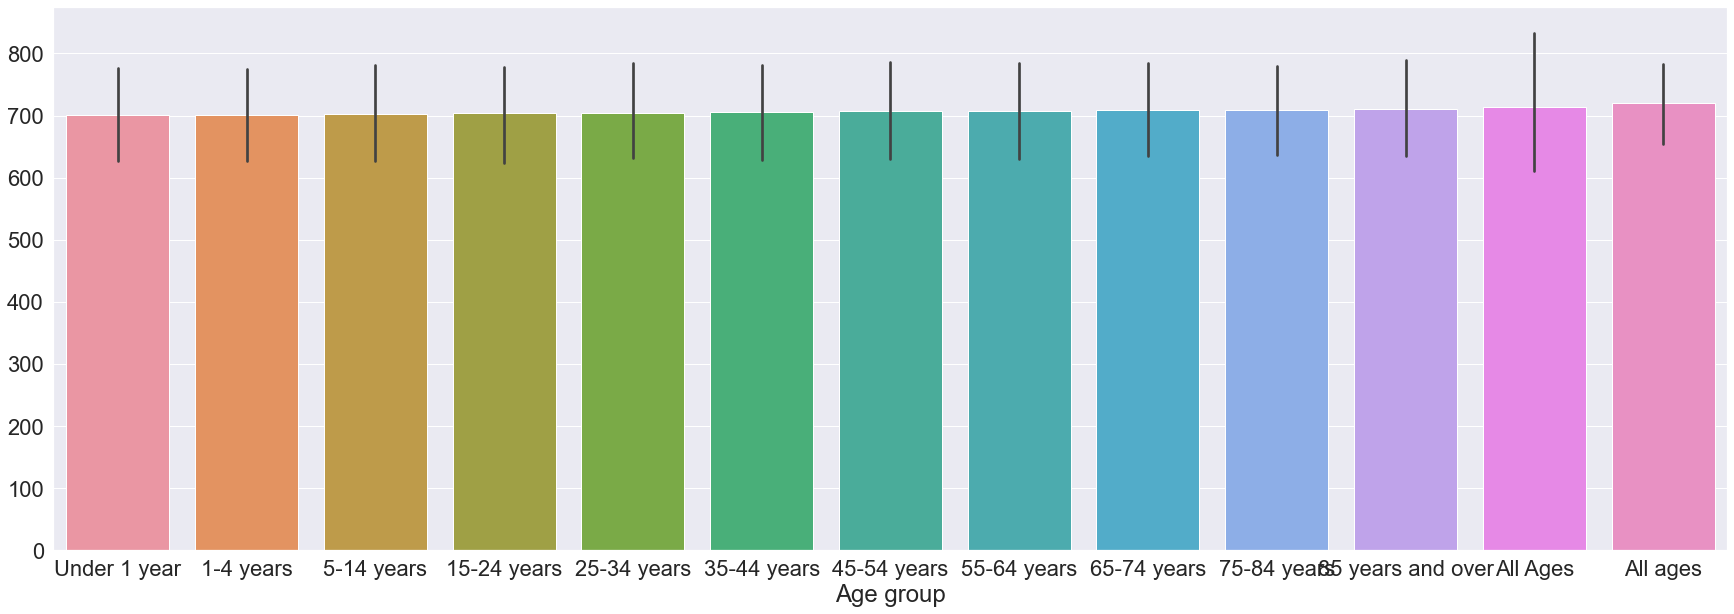

In [137]:
plt.figure(figsize=(30,10))
sns.barplot(x=df_age_clean['Age group'],y=df_age_clean.index)

In [138]:
df_age_clean

Data as of  Start week    End Week              State          Age group
0     08/05/2020  02/01/2020  08/01/2020      United States       Under 1 year
1     08/05/2020  02/01/2020  08/01/2020      United States          1-4 years
2     08/05/2020  02/01/2020  08/01/2020      United States         5-14 years
3     08/05/2020  02/01/2020  08/01/2020      United States        15-24 years
4     08/05/2020  02/01/2020  08/01/2020      United States        25-34 years
...          ...         ...         ...                ...                ...
1411  08/05/2020  02/01/2020  08/01/2020        Puerto Rico        75-84 years
1412  08/05/2020  02/01/2020  08/01/2020        Puerto Rico  85 years and over
1413  08/05/2020  02/01/2020  08/01/2020        Puerto Rico           All ages
1414  08/05/2020  02/01/2020  08/01/2020        Puerto Rico           All ages
1415  08/05/2020  02/01/2020  08/01/2020  Puerto Rico Total           All Ages

[1416 rows x 5 columns]

In [139]:
df_age_clean['State'].unique()

array(['United States', 'United States Total', 'Alabama', 'Alabama Total',
       'Alaska', 'Alaska Total', 'Arizona', 'Arizona Total', 'Arkansas',
       'Arkansas Total', 'California', 'California Total', 'Colorado',
       'Colorado Total', 'Connecticut', 'Connecticut Total', 'Delaware',
       'Delaware Total', 'District of Columbia',
       'District of Columbia Total', 'Florida', 'Florida Total',
       'Georgia', 'Georgia Total', 'Hawaii', 'Hawaii Total', 'Idaho',
       'Idaho Total', 'Illinois', 'Illinois Total', 'Indiana',
       'Indiana Total', 'Iowa', 'Iowa Total', 'Kansas', 'Kansas Total',
       'Kentucky', 'Kentucky Total', 'Louisiana', 'Louisiana Total',
       'Maine', 'Maine Total', 'Maryland', 'Maryland Total',
       'Massachusetts', 'Massachusetts Total', 'Michigan',
       'Michigan Total', 'Minnesota', 'Minnesota Total', 'Mississippi',
       'Mississippi Total', 'Missouri', 'Missouri Total', 'Montana',
       'Montana Total', 'Nebraska', 'Nebraska Total', 'Neva

In [140]:
countries_list=['United States','Alabama','Alaska','Arizona','California','Colorado','Florida','Georgia',
                            'Hawaii','Illinois','Iowa','Massachusetts','Nevada','New Hampshire','New Jersey','New Mexico'
                            ,'New York City','North Carolina','North Dakota','Ohio','Pennsylvania','South Carolina',
                            'South Dakota','Texas','Virginia','Washington']

In [141]:
def get_graph(c_name):
    
    
    countries_list=['United States','Alabama','Alaska','Arizona','California','Colorado','Florida','Georgia',
                            'Hawaii','Illinois','Iowa','Massachusetts','Nevada','New Hampshire','New Jersey','New Mexico'
                            ,'New York City','North Carolina','North Dakota','Ohio','Pennsylvania','South Carolina',
                            'South Dakota','Texas','Virginia','Washington']
    
    for x in countries_list:
        if(c_name==x):
            
            fig=px.bar(x=df_age_clean[df_age_clean['State']==x]['Age group'])
            fig.update_layout(title="Distribution Of Cases Age Wise of {}".format(c_name))
    return fig
            
            
            
    
    
    

In [142]:
px.bar(x=df_age_clean[df_age_clean['State']=='South Dakota']['Age group'])

In [143]:
get_graph('Texas')

In [144]:
df_age_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data as of  1416 non-null   object
 1   Start week  1416 non-null   object
 2   End Week    1416 non-null   object
 3   State       1416 non-null   object
 4   Age group   1416 non-null   object
dtypes: object(5)
memory usage: 55.4+ KB


In [145]:
df_age_clean[df_age_clean['State']=='United States']

Data as of  Start week    End Week          State          Age group
0   08/05/2020  02/01/2020  08/01/2020  United States       Under 1 year
1   08/05/2020  02/01/2020  08/01/2020  United States          1-4 years
2   08/05/2020  02/01/2020  08/01/2020  United States         5-14 years
3   08/05/2020  02/01/2020  08/01/2020  United States        15-24 years
4   08/05/2020  02/01/2020  08/01/2020  United States        25-34 years
5   08/05/2020  02/01/2020  08/01/2020  United States        35-44 years
6   08/05/2020  02/01/2020  08/01/2020  United States        45-54 years
7   08/05/2020  02/01/2020  08/01/2020  United States        55-64 years
8   08/05/2020  02/01/2020  08/01/2020  United States        65-74 years
9   08/05/2020  02/01/2020  08/01/2020  United States        75-84 years
10  08/05/2020  02/01/2020  08/01/2020  United States  85 years and over
11  08/05/2020  02/01/2020  08/01/2020  United States           All Ages
12  08/05/2020  02/01/2020  08/01/2020  United States       Under 1 year
13  08/05/2020  02/01/2020  08/01/2020  United States          1-4 years
14  08/05/2020  02/01/2020  08/01/2020  United States         5-14 years
15  08/05/2020  02/01/2020  08/01/2020  United States        15-24 years
16  08/05/2020  02/01/2020  08/01/2020  United States        25-34 years
17  08/05/2020  02/01/2020  08/01/2020  United States        35-44 years
18  08/05/2020  02/01/2020  08/01/2020  United States        45-54 years
19  08/05/2020  02/01/2020  08/01/2020  United States        55-64 years
20  08/05/2020  02/01/2020  08/01/2020  United States        65-74 years
21  08/05/2020  02/01/2020  08/01/2020  United States        75-84 years
22  08/05/2020  02/01/2020  08/01/2020  United States  85 years and over
23  08/05/2020  02/01/2020  08/01/2020  United States           All ages
24  08/05/2020  02/01/2020  08/01/2020  United States       Under 1 year
25  08/05/2020  02/01/2020  08/01/2020  United States          1-4 years
26  08/05/2020  02/01/2020  08/01/2020  United States         5-14 years
27  08/05/2020  02/01/2020  08/01/2020  United States        15-24 years
28  08/05/2020  02/01/2020  08/01/2020  United States        25-34 years
29  08/05/2020  02/01/2020  08/01/2020  United States        35-44 years
30  08/05/2020  02/01/2020  08/01/2020  United States        45-54 years
31  08/05/2020  02/01/2020  08/01/2020  United States        55-64 years
32  08/05/2020  02/01/2020  08/01/2020  United States        65-74 years
33  08/05/2020  02/01/2020  08/01/2020  United States        75-84 years
34  08/05/2020  02/01/2020  08/01/2020  United States  85 years and over
35  08/05/2020  02/01/2020  08/01/2020  United States           All ages
36  08/05/2020  02/01/2020  08/01/2020  United States           All ages

In [146]:
df_age_clean.groupby('State')['Age group'].count()

State
Alabama                25
Alabama Total           1
Alaska                 25
Alaska Total            1
Arizona                25
                       ..
West Virginia Total     1
Wisconsin              25
Wisconsin Total         1
Wyoming                25
Wyoming Total           1
Name: Age group, Length: 108, dtype: int64

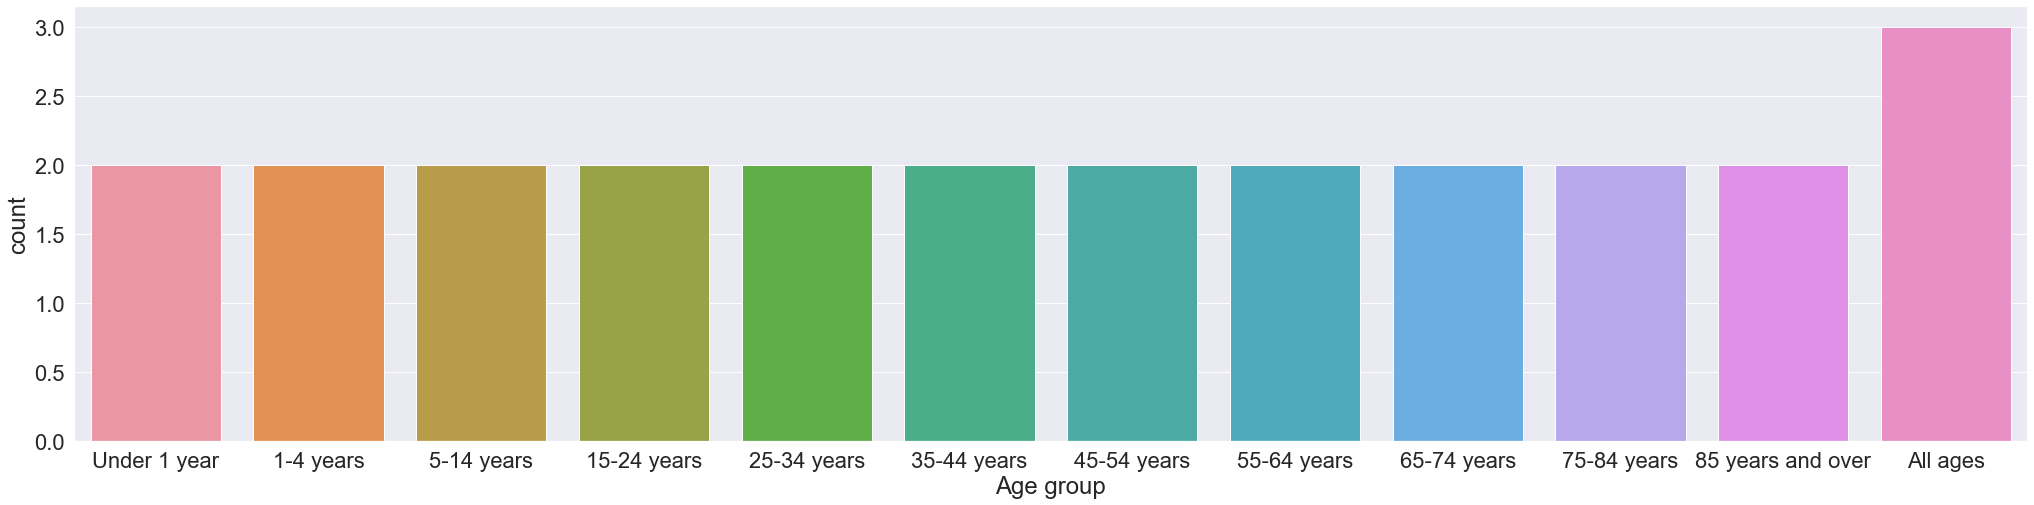

In [147]:
plt.figure(figsize=(35,8))
sns.countplot(df_age_clean[df_age_clean['State']=='South Dakota']['Age group'])

In [148]:
px.bar(x=df_age_clean[df_age_clean['State']=='South Dakota']['Age group'])

In [149]:
df_age_clean['Age group'].value_counts()

All ages             162
45-54 years          109
Under 1 year         109
85 years and over    109
25-34 years          109
75-84 years          109
5-14 years           109
15-24 years          109
55-64 years          109
35-44 years          109
1-4 years            109
65-74 years          109
All Ages              55
Name: Age group, dtype: int64

In [150]:
df_age['Age Group'].value_counts()

41-50       157
18-30       155
31-40       151
51-60       150
71-80       147
61-70       146
81+         144
under 18    127
Name: Age Group, dtype: int64

In [151]:
fig=px.bar(y=df_age_clean.index,x=df_age_clean['Age group'])
fig.update_layout(title='Distribution Of Cases As Per Age : ',yaxis_title='Number Of Cumulative Cases',xaxis_title='Age Groups')
fig.show()

In [152]:
df_age_clean=df_age_clean[df_age_clean['Age group']!='All Ages']


In [153]:
df_age_clean

Data as of  Start week    End Week          State          Age group
0     08/05/2020  02/01/2020  08/01/2020  United States       Under 1 year
1     08/05/2020  02/01/2020  08/01/2020  United States          1-4 years
2     08/05/2020  02/01/2020  08/01/2020  United States         5-14 years
3     08/05/2020  02/01/2020  08/01/2020  United States        15-24 years
4     08/05/2020  02/01/2020  08/01/2020  United States        25-34 years
...          ...         ...         ...            ...                ...
1410  08/05/2020  02/01/2020  08/01/2020    Puerto Rico        65-74 years
1411  08/05/2020  02/01/2020  08/01/2020    Puerto Rico        75-84 years
1412  08/05/2020  02/01/2020  08/01/2020    Puerto Rico  85 years and over
1413  08/05/2020  02/01/2020  08/01/2020    Puerto Rico           All ages
1414  08/05/2020  02/01/2020  08/01/2020    Puerto Rico           All ages

[1361 rows x 5 columns]

In [154]:
fig=px.bar(y=df_age_clean.index,x=df_age_clean['Age group'])
fig.update_layout(title='Distribution Of Cases As Per Age : ',yaxis_title='Number Of Cumulative Cases',xaxis_title='Age Groups')
fig.show()

In [155]:
df_age_clean['Age group'].unique()

array(['Under 1 year', '1-4 years', '5-14 years', '15-24 years',
       '25-34 years', '35-44 years', '45-54 years', '55-64 years',
       '65-74 years', '75-84 years', '85 years and over', 'All ages'],
      dtype=object)

In [156]:
gc_1=df_age_clean[df_age_clean['Age group']=='Under 1 year']

In [157]:
gc_1['State']

0       United States
12      United States
24      United States
38            Alabama
50            Alabama
            ...      
1350        Wisconsin
1364          Wyoming
1376          Wyoming
1390      Puerto Rico
1402      Puerto Rico
Name: State, Length: 109, dtype: object